In [2]:
pip install sqlalchemy pymysql pandas


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
%matplotlib inline


In [11]:
import matplotlib
matplotlib.use("TkAgg")   # Or "QtAgg" depending on your system


C:\Users\SURYA\AppData\Local\Temp\ipykernel_10832\106916068.py:22: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


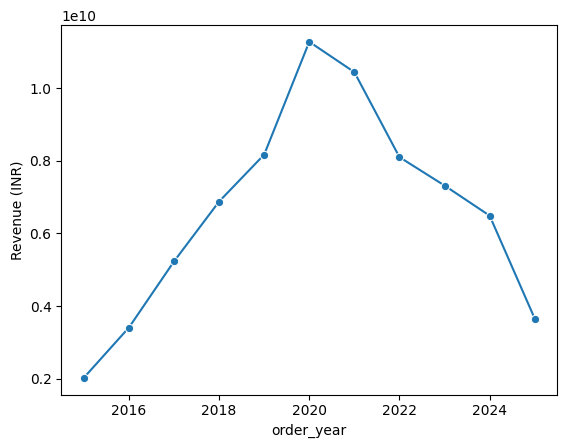

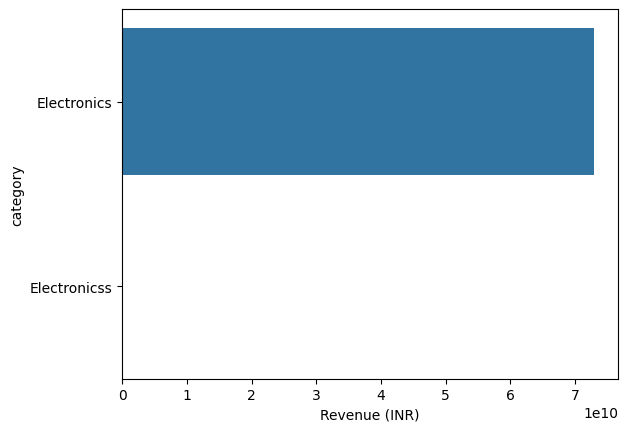

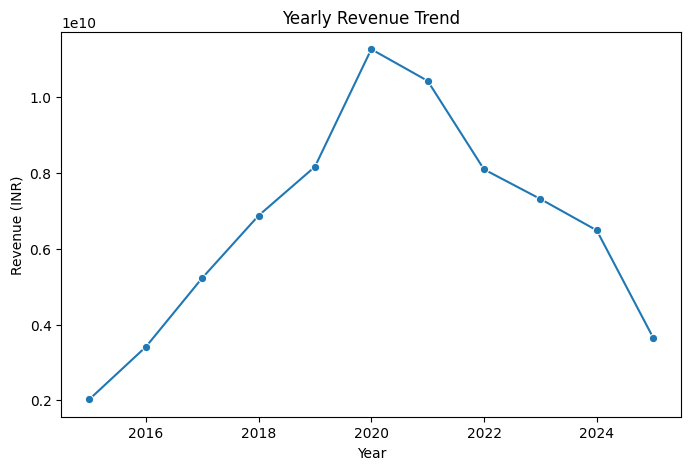

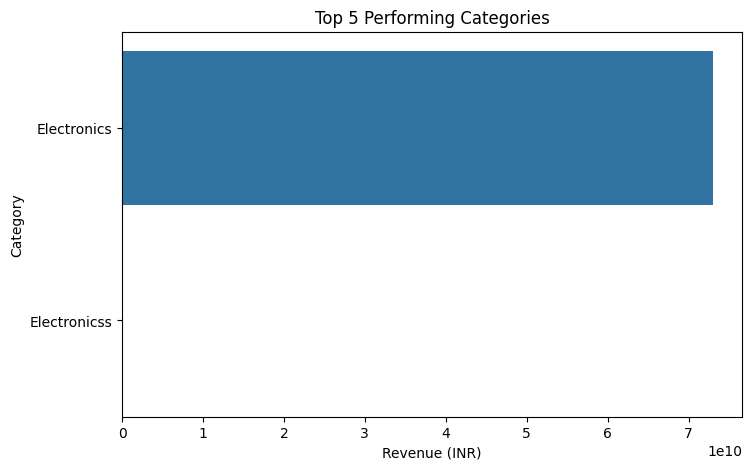

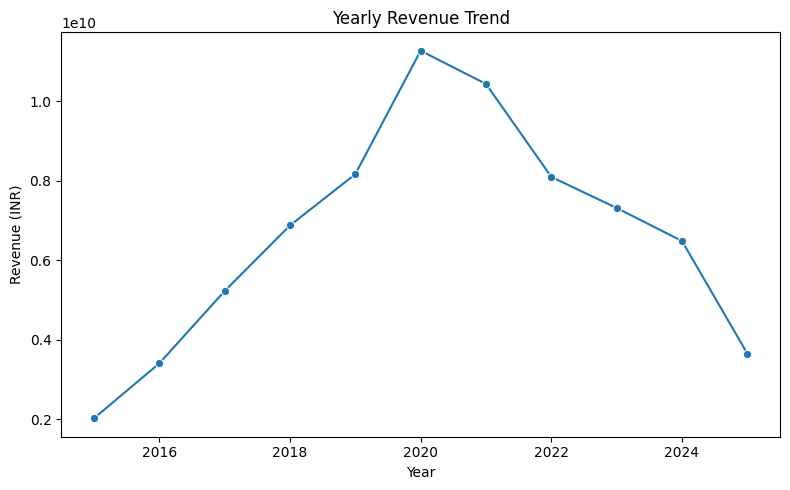

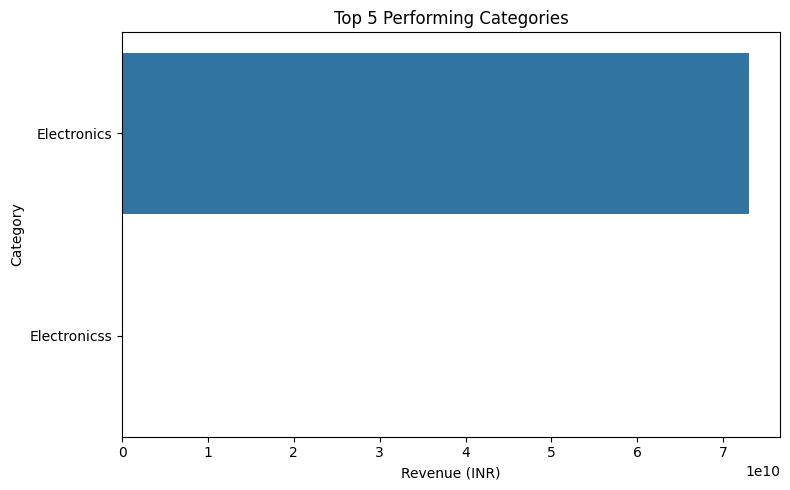

C:\Users\SURYA\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


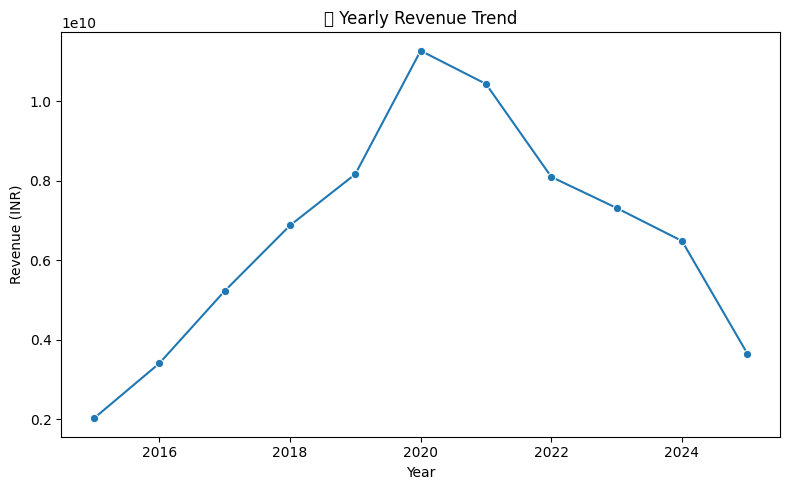

C:\Users\SURYA\AppData\Local\Temp\ipykernel_10832\106916068.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_categories, x="final_amount_inr", y="category", palette="viridis")
C:\Users\SURYA\AppData\Local\Temp\ipykernel_10832\106916068.py:39: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\SURYA\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


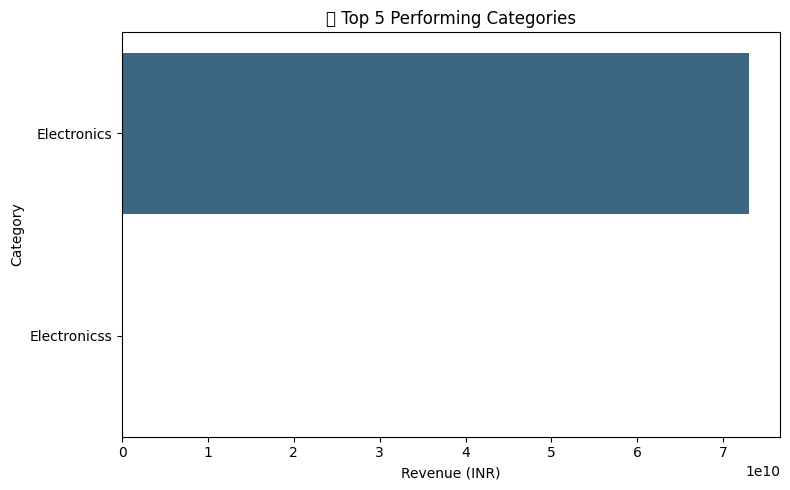

In [ ]:
# Question 1
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load Data
df = pd.read_csv(r"C:\code\Amazon_India_Analytics\data\cleaned\amazon_sales_cleaned.csv")

# 2. Convert order_date to datetime
df["order_date"] = pd.to_datetime(df["order_date"], errors="coerce")
df = df[df["order_date"].notna()]
df["Year"] = df["order_date"].dt.year

# Chart 1: Yearly Revenue Trend
yearly_revenue = df.groupby("Year")["final_amount_inr"].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.lineplot(data=yearly_revenue, x="Year", y="final_amount_inr", marker="o")
plt.title("📈 Yearly Revenue Trend")
plt.xlabel("Year")
plt.ylabel("Revenue (INR)")
plt.tight_layout()
plt.show()

# Chart 2: Top 5 Categories
top_categories = (
    df.groupby("category")["final_amount_inr"]
    .sum()
    .reset_index()
    .sort_values(by="final_amount_inr", ascending=False)
    .head(5)
)

plt.figure(figsize=(8, 5))
sns.barplot(data=top_categories, x="final_amount_inr", y="category", palette="viridis")
plt.title("🏆 Top 5 Performing Categories")
plt.xlabel("Revenue (INR)")
plt.ylabel("Category")
plt.tight_layout()
plt.show()


📊 Current Month Revenue: 295,283,649 INR
🎯 Target Revenue: 354,340,378 INR
🧑‍🤝‍🧑 New Customers: 5637
⚠️ ALERT: Revenue below target!


C:\Users\SURYA\AppData\Local\Temp\ipykernel_10832\1650896100.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Actual", "Target"], y=[current_revenue, target_revenue], palette="Set2")


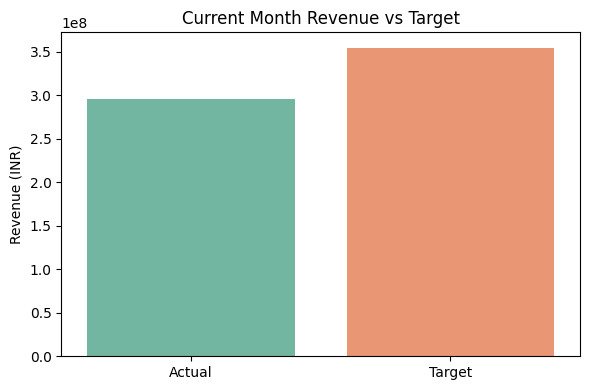

C:\Users\SURYA\AppData\Local\Temp\ipykernel_10832\1650896100.py:59: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\SURYA\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


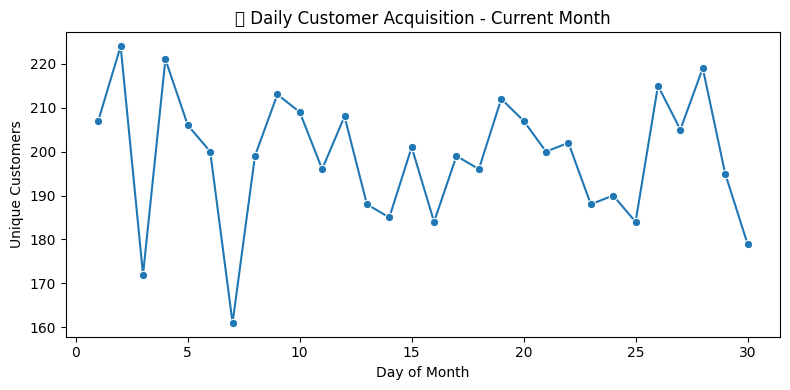

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# ----------------------------
# 1. Load Data
# ----------------------------
df = pd.read_csv(r"C:\code\Amazon_India_Analytics\data\cleaned\amazon_sales_cleaned.csv")

# Convert order_date
df["order_date"] = pd.to_datetime(df["order_date"], errors="coerce")
df = df[df["order_date"].notna()]
df["Year"] = df["order_date"].dt.year
df["Month"] = df["order_date"].dt.month

# ----------------------------
# 2. Current Month Performance
# ----------------------------
today = dt.datetime.today()
current_year, current_month = today.year, today.month

current_month_data = df[(df["Year"] == current_year) & (df["Month"] == current_month)]

current_revenue = current_month_data["final_amount_inr"].sum()
unique_customers = current_month_data["customer_id"].nunique()

# Simulated target for demo (change as needed)
target_revenue = current_revenue * 1.2  

print(f"📊 Current Month Revenue: {current_revenue:,.0f} INR")
print(f"🎯 Target Revenue: {target_revenue:,.0f} INR")
print(f"🧑‍🤝‍🧑 New Customers: {unique_customers}")

# Alert
if current_revenue < target_revenue:
    print("⚠️ ALERT: Revenue below target!")

# ----------------------------
# 3. Visualization
# ----------------------------

# Revenue vs Target (Bar Chart)
plt.figure(figsize=(6,4))
sns.barplot(x=["Actual", "Target"], y=[current_revenue, target_revenue], palette="Set2")
plt.title("Current Month Revenue vs Target")
plt.ylabel("Revenue (INR)")
plt.tight_layout()
plt.show()

# Customer Acquisition (Daily Trend in Current Month)
daily_customers = current_month_data.groupby(current_month_data["order_date"].dt.day)["customer_id"].nunique()

plt.figure(figsize=(8,4))
sns.lineplot(x=daily_customers.index, y=daily_customers.values, marker="o")
plt.title("📈 Daily Customer Acquisition - Current Month")
plt.xlabel("Day of Month")
plt.ylabel("Unique Customers")
plt.tight_layout()
plt.show()


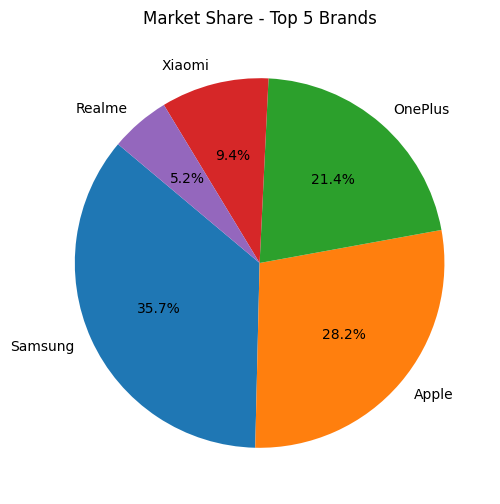

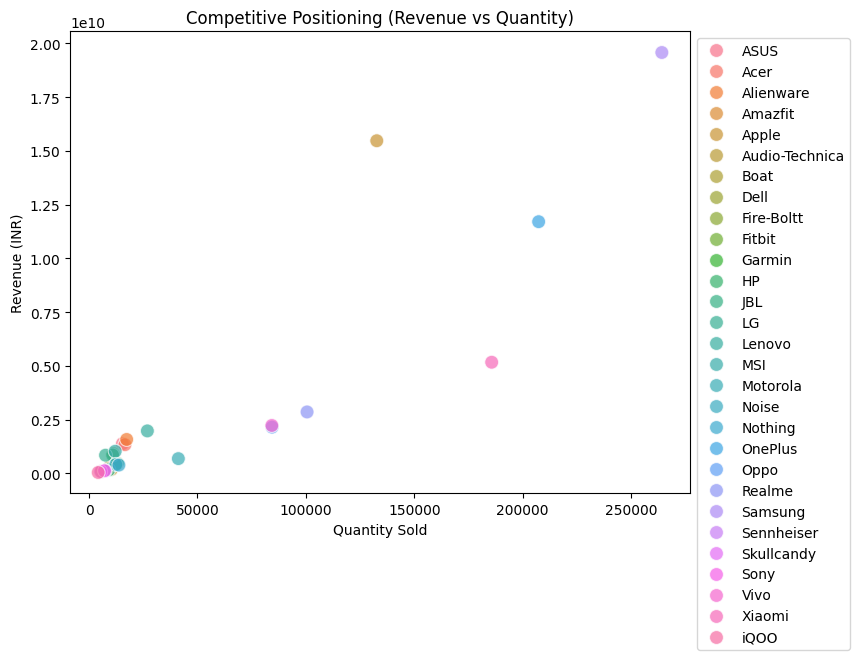

C:\Users\SURYA\AppData\Local\Temp\ipykernel_10832\2935880919.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_revenue.values, y=state_revenue.index, palette="viridis")


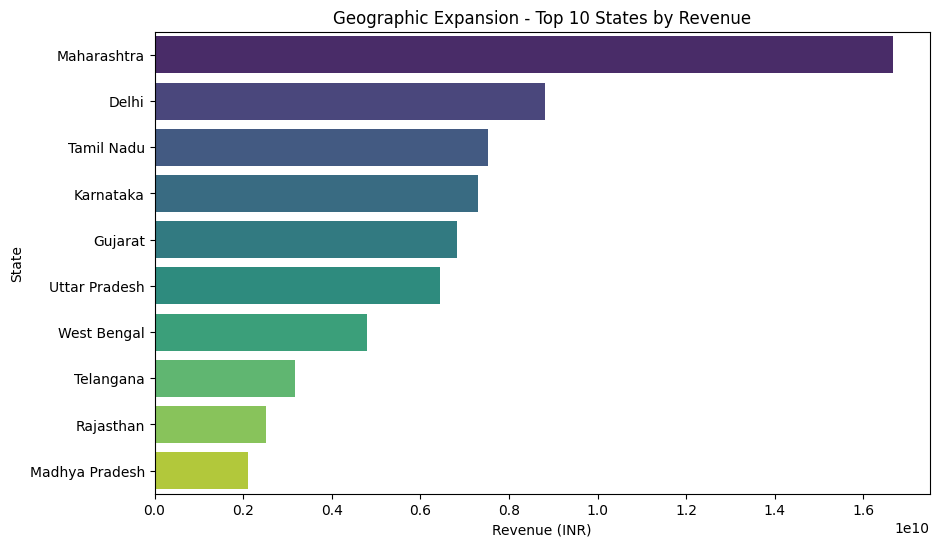

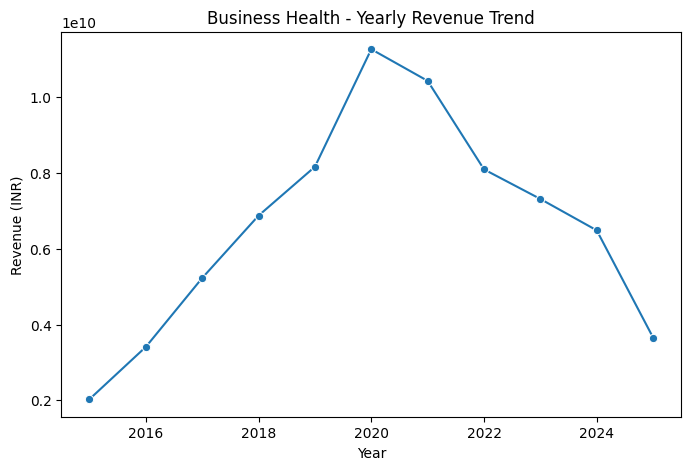

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------
# 1. Load Data
# ----------------------------
df = pd.read_csv(r"C:\code\Amazon_India_Analytics\data\cleaned\amazon_sales_cleaned.csv")

# Convert order_date
df["order_date"] = pd.to_datetime(df["order_date"], errors="coerce")
df = df[df["order_date"].notna()]
df["Year"] = df["order_date"].dt.year

# ----------------------------
# 2. Market Share (Top 5 Brands)
# ----------------------------
brand_revenue = df.groupby("brand")["final_amount_inr"].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(6,6))
plt.pie(brand_revenue, labels=brand_revenue.index, autopct="%1.1f%%", startangle=140)
plt.title("Market Share - Top 5 Brands")
plt.show()

# ----------------------------
# 3. Competitive Positioning (Revenue vs Quantity)
# ----------------------------
brand_perf = df.groupby("brand")[["final_amount_inr","quantity"]].sum().reset_index()

plt.figure(figsize=(8,6))
sns.scatterplot(data=brand_perf, x="quantity", y="final_amount_inr", hue="brand", s=100, alpha=0.7)
plt.title("Competitive Positioning (Revenue vs Quantity)")
plt.xlabel("Quantity Sold")
plt.ylabel("Revenue (INR)")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

# ----------------------------
# 4. Geographic Expansion (Revenue by State)
# ----------------------------
state_revenue = df.groupby("customer_state")["final_amount_inr"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=state_revenue.values, y=state_revenue.index, palette="viridis")
plt.title("Geographic Expansion - Top 10 States by Revenue")
plt.xlabel("Revenue (INR)")
plt.ylabel("State")
plt.show()

# ----------------------------
# 5. Business Health (Yearly Revenue Trend)
# ----------------------------
yearly_revenue = df.groupby("Year")["final_amount_inr"].sum().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(data=yearly_revenue, x="Year", y="final_amount_inr", marker="o")
plt.title("Business Health - Yearly Revenue Trend")
plt.xlabel("Year")
plt.ylabel("Revenue (INR)")
plt.show()


C:\Users\SURYA\AppData\Local\Temp\ipykernel_10832\3956542670.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_revenue.values, y=category_revenue.index, palette="coolwarm")


<function matplotlib.pyplot.xlabel(xlabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['left', 'center', 'right'] | None" = None, **kwargs) -> 'Text'>

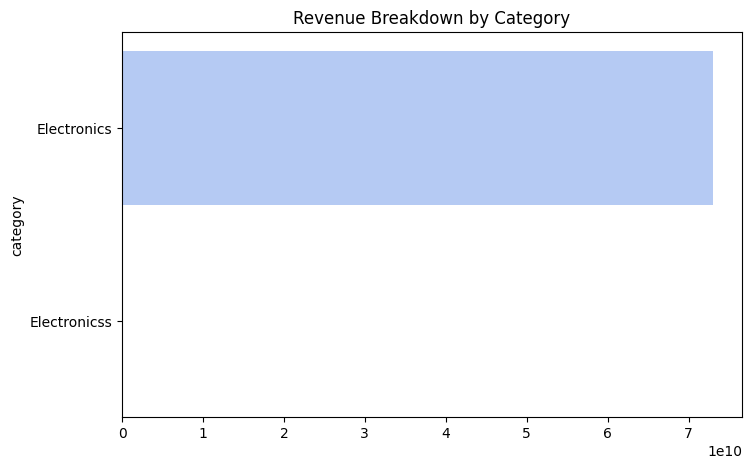

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------
# 1. Load Data
# ----------------------------
df = pd.read_csv(r"C:\code\Amazon_India_Analytics\data\cleaned\amazon_sales_cleaned.csv")

# Convert order_date
df["order_date"] = pd.to_datetime(df["order_date"], errors="coerce")
df = df[df["order_date"].notna()]
df["Year"] = df["order_date"].dt.year

# ----------------------------
# 2. Revenue Breakdown by Category
# ----------------------------
category_revenue = df.groupby("category")["final_amount_inr"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=category_revenue.values, y=category_revenue.index, palette="coolwarm")
plt.title("Revenue Breakdown by Category")
plt.xlabel


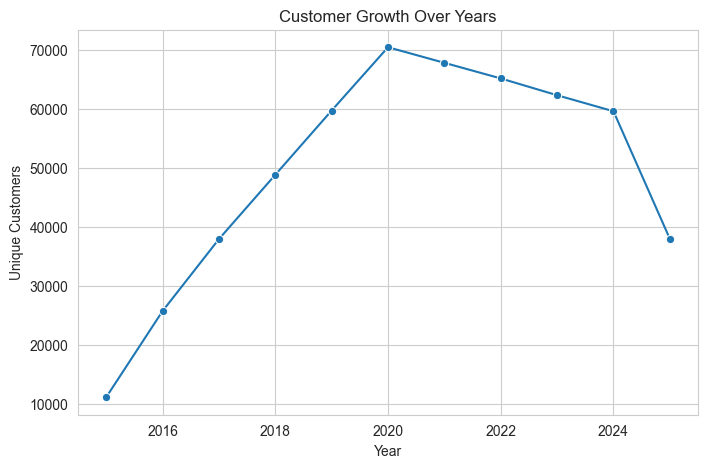

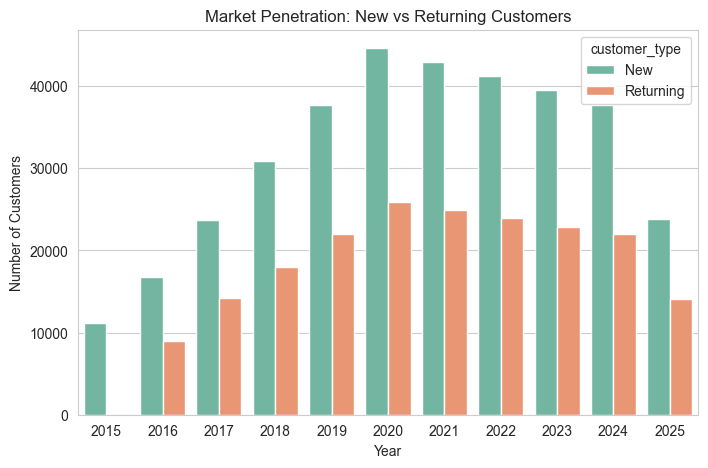

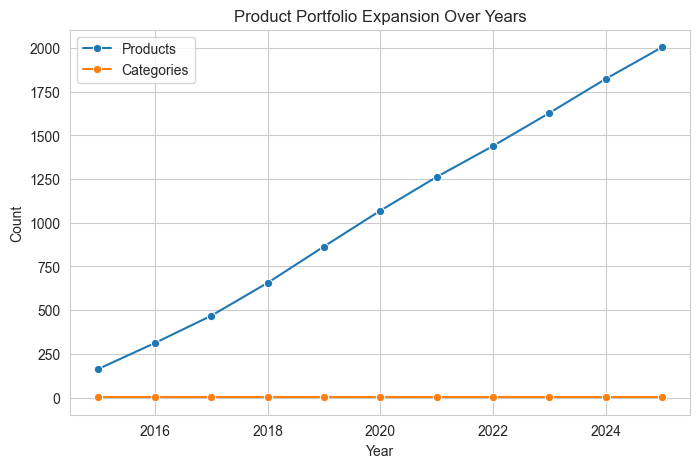

C:\Users\SURYA\AppData\Local\Temp\ipykernel_10832\1809907828.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=festival_sales.values, y=festival_sales.index, palette="magma")


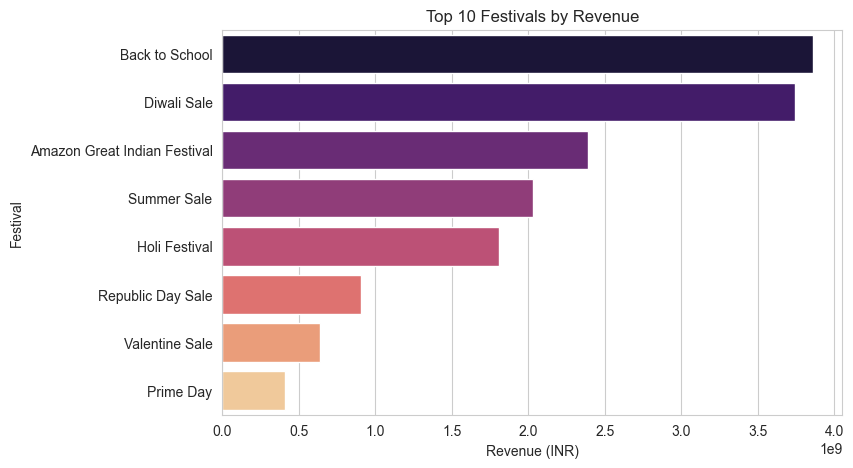

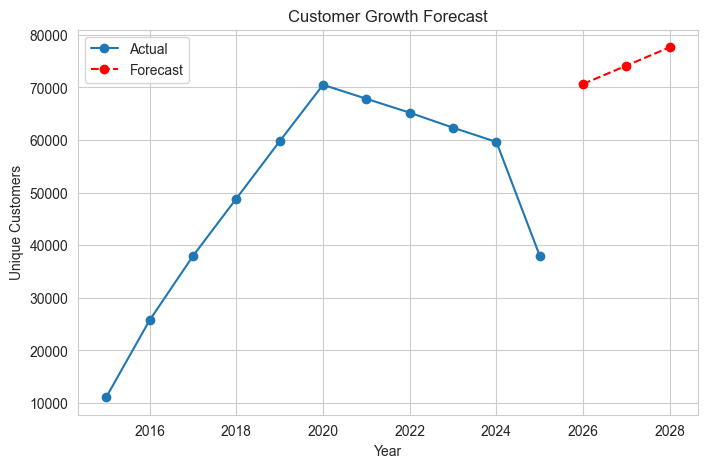

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")

# ----------------------------
# 1. Load Data
# ----------------------------
df = pd.read_csv(r"C:\code\Amazon_India_Analytics\data\cleaned\amazon_sales_cleaned.csv")

# Convert order_date
df["order_date"] = pd.to_datetime(df["order_date"], errors="coerce")
df = df[df["order_date"].notna()]
df["Year"] = df["order_date"].dt.year
df["Month"] = df["order_date"].dt.to_period("M")

# ----------------------------
# 2. Customer Growth
# ----------------------------
customer_growth = df.groupby("Year")["customer_id"].nunique().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(data=customer_growth, x="Year", y="customer_id", marker="o")
plt.title("Customer Growth Over Years")
plt.xlabel("Year")
plt.ylabel("Unique Customers")
plt.show()

# ----------------------------
# 3. Market Penetration (New vs Returning)
# ----------------------------
first_purchase = df.groupby("customer_id")["Year"].min().reset_index()
first_purchase.columns = ["customer_id", "first_year"]

df = df.merge(first_purchase, on="customer_id", how="left")
df["customer_type"] = np.where(df["Year"] == df["first_year"], "New", "Returning")

market_penetration = df.groupby(["Year", "customer_type"])["customer_id"].nunique().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=market_penetration, x="Year", y="customer_id", hue="customer_type", palette="Set2")
plt.title("Market Penetration: New vs Returning Customers")
plt.xlabel("Year")
plt.ylabel("Number of Customers")
plt.show()

# ----------------------------
# 4. Product Portfolio Expansion
# ----------------------------
product_expansion = df.groupby("Year")["product_id"].nunique().reset_index()
category_expansion = df.groupby("Year")["category"].nunique().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(data=product_expansion, x="Year", y="product_id", marker="o", label="Products")
sns.lineplot(data=category_expansion, x="Year", y="category", marker="o", label="Categories")
plt.title("Product Portfolio Expansion Over Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend()
plt.show()

# ----------------------------
# 5. Strategic Initiative Performance (Festival Sales)
# ----------------------------
festival_sales = df[df['festival_name'].notna()].groupby("festival_name")["final_amount_inr"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=festival_sales.values, y=festival_sales.index, palette="magma")
plt.title("Top 10 Festivals by Revenue")
plt.xlabel("Revenue (INR)")
plt.ylabel("Festival")
plt.show()

# ----------------------------
# 6. Predictive Insights (Customer Growth Forecast)
# ----------------------------
X = customer_growth["Year"].values
y = customer_growth["customer_id"].values

# Fit simple linear trend using NumPy
coeff = np.polyfit(X, y, 1)  # linear fit
trend = np.poly1d(coeff)

future_years = np.array([2026, 2027, 2028])
predicted_customers = trend(future_years)

plt.figure(figsize=(8,5))
plt.plot(X, y, marker="o", label="Actual")
plt.plot(future_years, predicted_customers, marker="o", linestyle="--", color="red", label="Forecast")
plt.title("Customer Growth Forecast")
plt.xlabel("Year")
plt.ylabel("Unique Customers")
plt.legend()
plt.show()


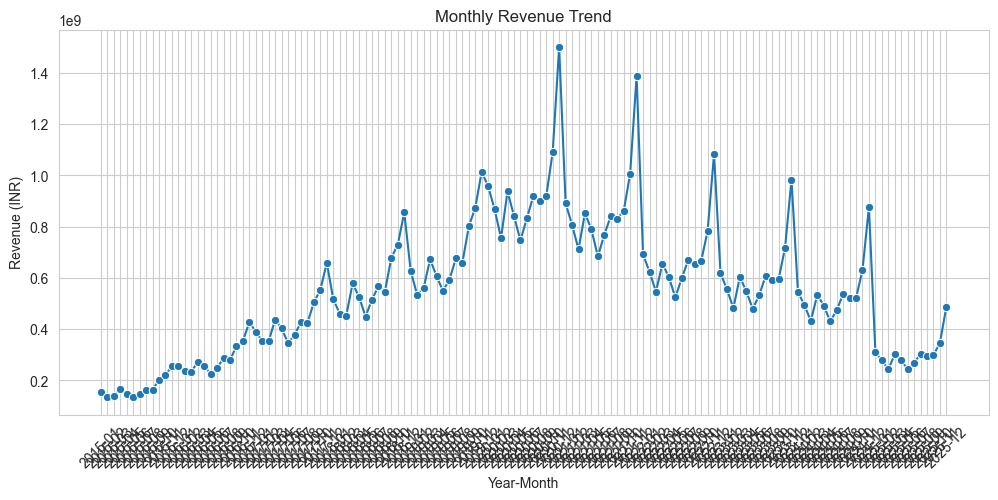

C:\Users\SURYA\AppData\Local\Temp\ipykernel_10832\3413831262.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=quarterly_revenue["Quarter"].astype(str), y=quarterly_revenue["final_amount_inr"], palette="coolwarm")


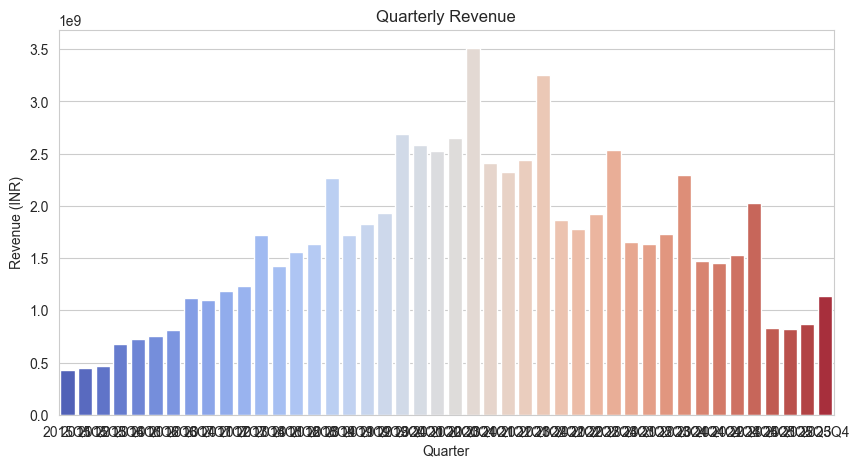

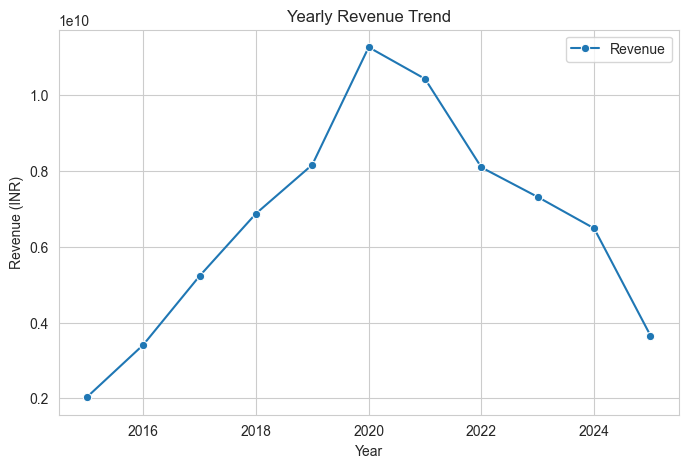

C:\Users\SURYA\AppData\Local\Temp\ipykernel_10832\3413831262.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yearly_revenue["Year"], y=yearly_revenue["growth_rate"], palette="viridis")


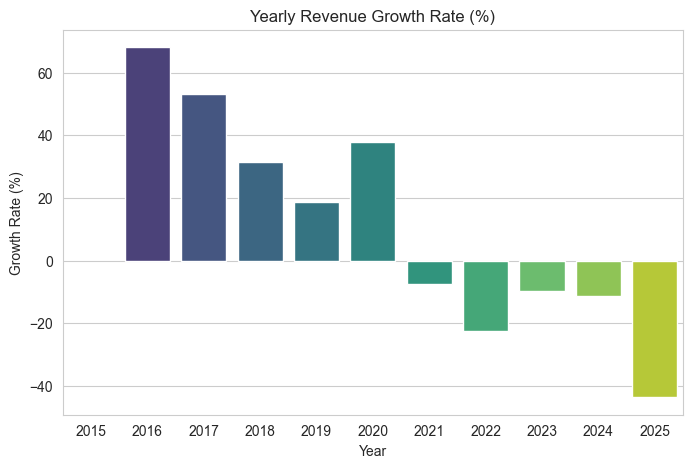

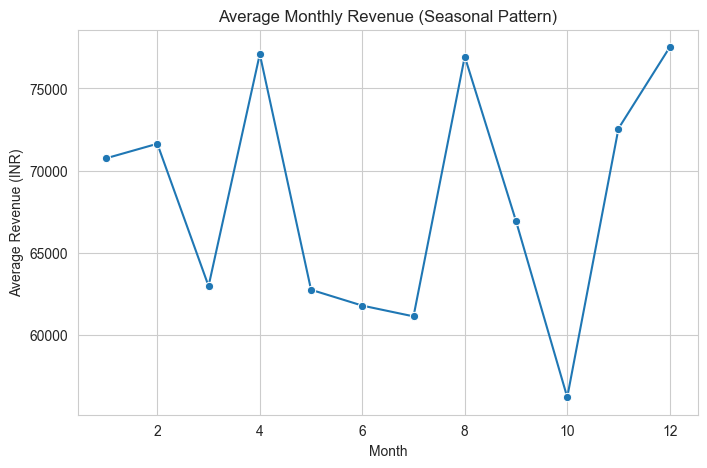

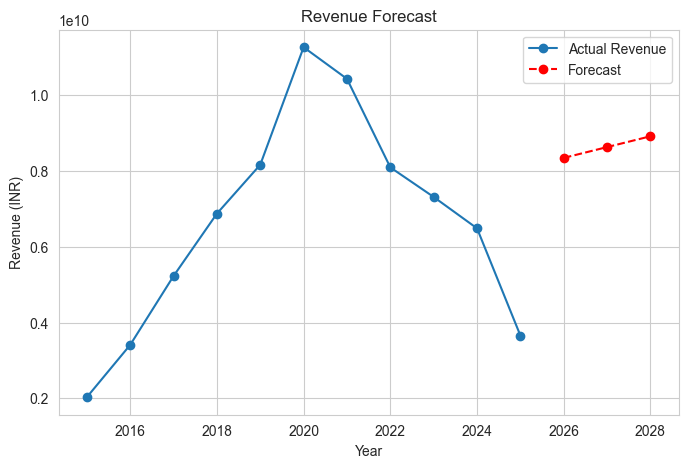

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")

# ----------------------------
# 1. Load Data
# ----------------------------
df = pd.read_csv(r"C:\code\Amazon_India_Analytics\data\cleaned\amazon_sales_cleaned.csv")

# Convert order_date
df["order_date"] = pd.to_datetime(df["order_date"], errors="coerce")
df = df[df["order_date"].notna()]
df["Year"] = df["order_date"].dt.year
df["Month"] = df["order_date"].dt.month
df["Quarter"] = df["order_date"].dt.to_period("Q")

# ----------------------------
# 2. Monthly Revenue
# ----------------------------
monthly_revenue = df.groupby(["Year", "Month"])["final_amount_inr"].sum().reset_index()
monthly_revenue["Year-Month"] = monthly_revenue["Year"].astype(str) + "-" + monthly_revenue["Month"].astype(str).str.zfill(2)

plt.figure(figsize=(12,5))
sns.lineplot(data=monthly_revenue, x="Year-Month", y="final_amount_inr", marker="o")
plt.xticks(rotation=45)
plt.title("Monthly Revenue Trend")
plt.xlabel("Year-Month")
plt.ylabel("Revenue (INR)")
plt.show()

# ----------------------------
# 3. Quarterly Revenue
# ----------------------------
quarterly_revenue = df.groupby("Quarter")["final_amount_inr"].sum().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x=quarterly_revenue["Quarter"].astype(str), y=quarterly_revenue["final_amount_inr"], palette="coolwarm")
plt.title("Quarterly Revenue")
plt.xlabel("Quarter")
plt.ylabel("Revenue (INR)")
plt.show()

# ----------------------------
# 4. Yearly Revenue and Growth Rate
# ----------------------------
yearly_revenue = df.groupby("Year")["final_amount_inr"].sum().reset_index()
yearly_revenue["growth_rate"] = yearly_revenue["final_amount_inr"].pct_change() * 100

plt.figure(figsize=(8,5))
sns.lineplot(data=yearly_revenue, x="Year", y="final_amount_inr", marker="o", label="Revenue")
plt.title("Yearly Revenue Trend")
plt.xlabel("Year")
plt.ylabel("Revenue (INR)")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x=yearly_revenue["Year"], y=yearly_revenue["growth_rate"], palette="viridis")
plt.title("Yearly Revenue Growth Rate (%)")
plt.xlabel("Year")
plt.ylabel("Growth Rate (%)")
plt.show()

# ----------------------------
# 5. Seasonal Revenue Analysis (Monthly Pattern)
# ----------------------------
seasonal_revenue = df.groupby("Month")["final_amount_inr"].mean().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(data=seasonal_revenue, x="Month", y="final_amount_inr", marker="o")
plt.title("Average Monthly Revenue (Seasonal Pattern)")
plt.xlabel("Month")
plt.ylabel("Average Revenue (INR)")
plt.show()

# ----------------------------
# 6. Revenue Forecast (Simple Linear Trend)
# ----------------------------
X = yearly_revenue["Year"].values
y = yearly_revenue["final_amount_inr"].values

coeff = np.polyfit(X, y, 1)  # linear fit
trend = np.poly1d(coeff)

future_years = np.array([2026, 2027, 2028])
predicted_revenue = trend(future_years)

plt.figure(figsize=(8,5))
plt.plot(X, y, marker="o", label="Actual Revenue")
plt.plot(future_years, predicted_revenue, marker="o", linestyle="--", color="red", label="Forecast")
plt.title("Revenue Forecast")
plt.xlabel("Year")
plt.ylabel("Revenue (INR)")
plt.legend()
plt.show()


C:\Users\SURYA\AppData\Local\Temp\ipykernel_10832\3971586668.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_revenue.values, y=category_revenue.index, palette="coolwarm")


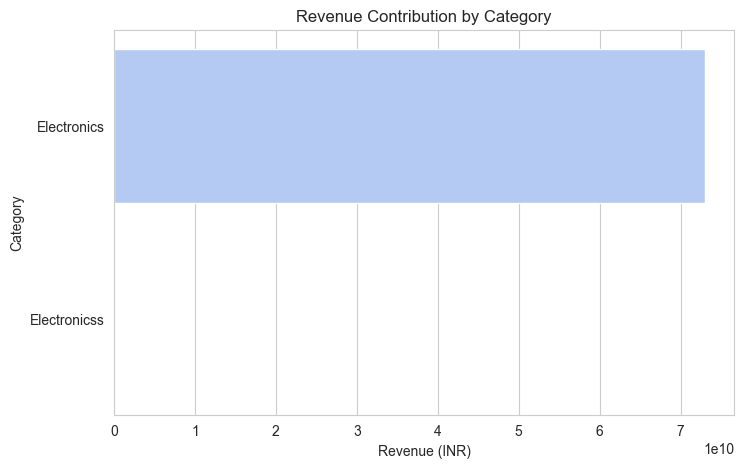

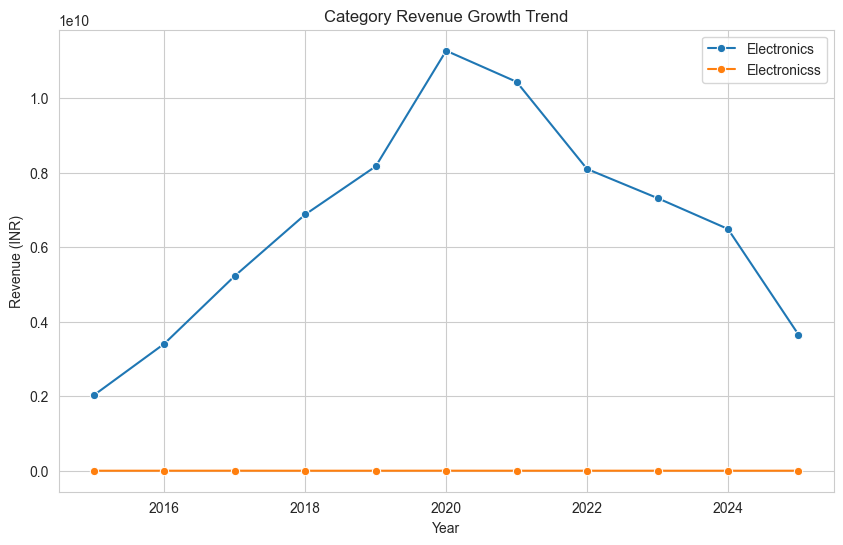

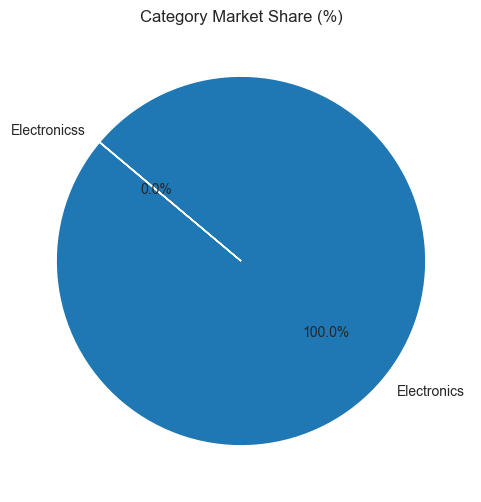

C:\Users\SURYA\AppData\Local\Temp\ipykernel_10832\3971586668.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_profit.values, y=category_profit.index, palette="viridis")


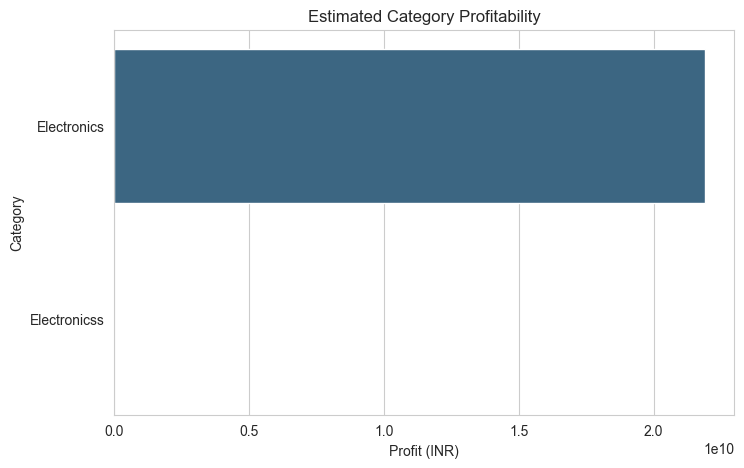

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")

# ----------------------------
# 1. Load Data
# ----------------------------
df = pd.read_csv(r"C:\code\Amazon_India_Analytics\data\cleaned\amazon_sales_cleaned.csv")

# Convert order_date
df["order_date"] = pd.to_datetime(df["order_date"], errors="coerce")
df = df[df["order_date"].notna()]
df["Year"] = df["order_date"].dt.year

# ----------------------------
# 2. Revenue Contribution by Category
# ----------------------------
category_revenue = df.groupby("category")["final_amount_inr"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=category_revenue.values, y=category_revenue.index, palette="coolwarm")
plt.title("Revenue Contribution by Category")
plt.xlabel("Revenue (INR)")
plt.ylabel("Category")
plt.show()

# ----------------------------
# 3. Category Growth Trends
# ----------------------------
category_yearly = df.groupby(["Year","category"])["final_amount_inr"].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=category_yearly, x="Year", y="final_amount_inr", hue="category", marker="o")
plt.title("Category Revenue Growth Trend")
plt.xlabel("Year")
plt.ylabel("Revenue (INR)")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

# ----------------------------
# 4. Category Market Share
# ----------------------------
total_revenue = df["final_amount_inr"].sum()
category_share = (category_revenue / total_revenue) * 100

plt.figure(figsize=(6,6))
plt.pie(category_share, labels=category_share.index, autopct="%1.1f%%", startangle=140)
plt.title("Category Market Share (%)")
plt.show()

# ----------------------------
# 5. Estimated Category Profitability
# ----------------------------
# Assume 30% profit margin
df["profit_estimate"] = df["final_amount_inr"] * 0.3
category_profit = df.groupby("category")["profit_estimate"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=category_profit.values, y=category_profit.index, palette="viridis")
plt.title("Estimated Category Profitability")
plt.xlabel("Profit (INR)")
plt.ylabel("Category")
plt.show()


C:\Users\SURYA\AppData\Local\Temp\ipykernel_10832\3088603404.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_revenue.values, y=state_revenue.index, palette="viridis")


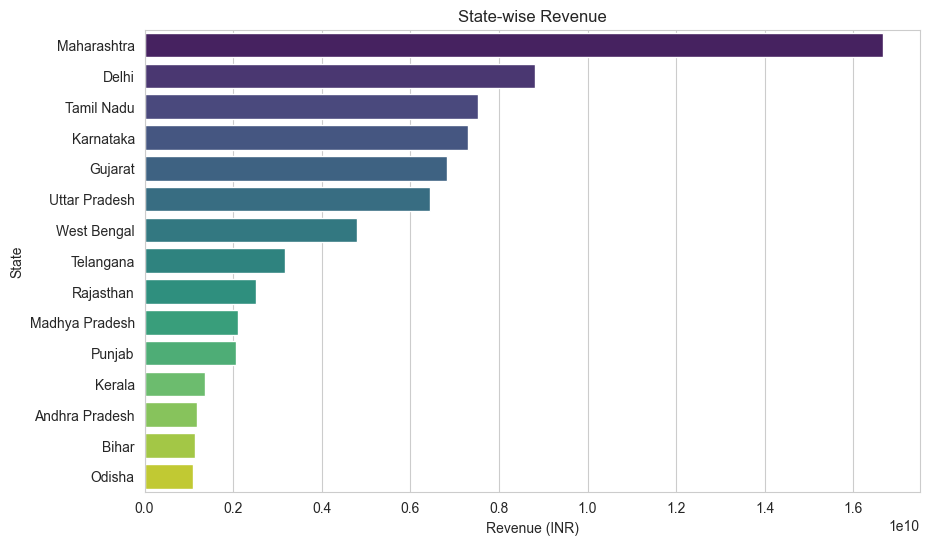

C:\Users\SURYA\AppData\Local\Temp\ipykernel_10832\3088603404.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_revenue.values, y=city_revenue.index, palette="magma")


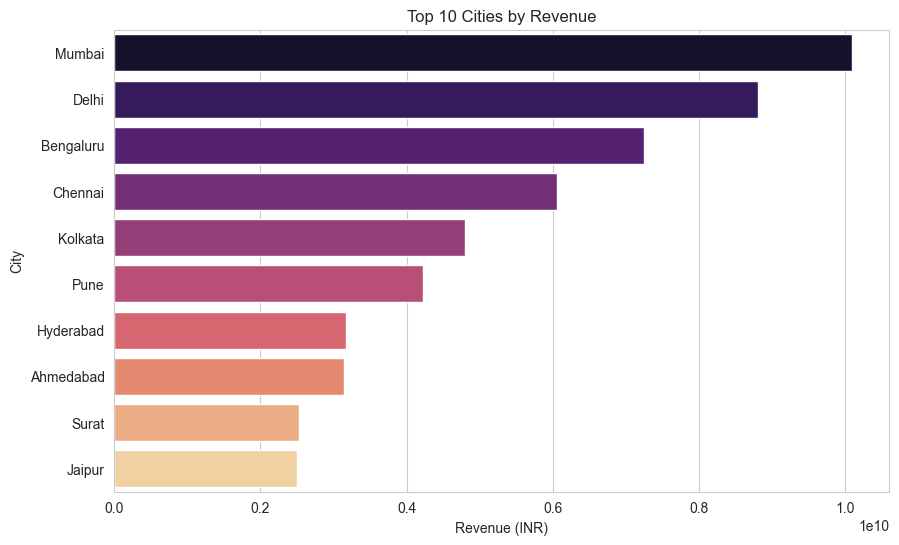

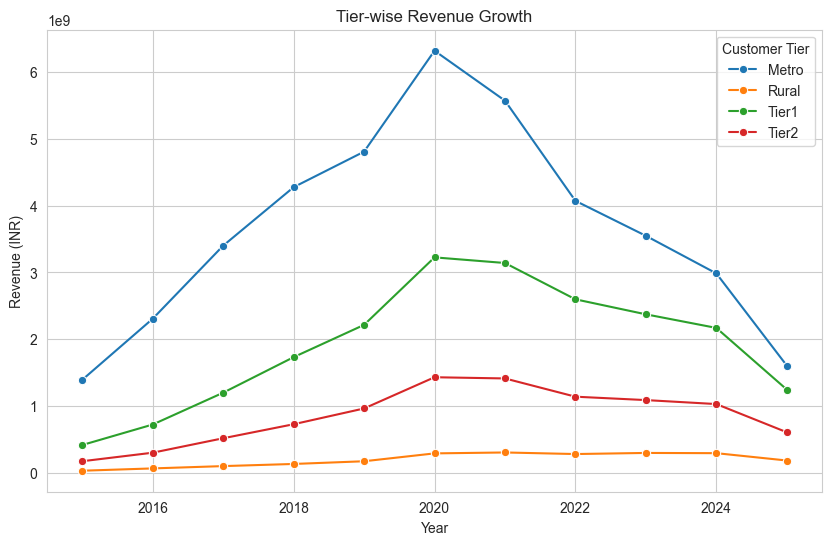

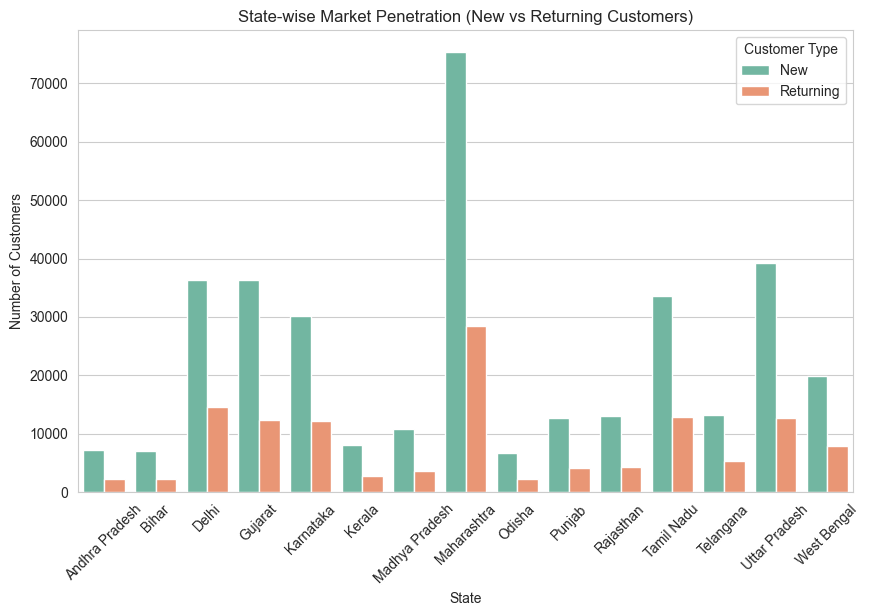

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")

# ----------------------------
# 1. Load Data
# ----------------------------
df = pd.read_csv(r"C:\code\Amazon_India_Analytics\data\cleaned\amazon_sales_cleaned.csv")

# Convert order_date
df["order_date"] = pd.to_datetime(df["order_date"], errors="coerce")
df = df[df["order_date"].notna()]
df["Year"] = df["order_date"].dt.year

# ----------------------------
# 2. State-wise Revenue
# ----------------------------
state_revenue = df.groupby("customer_state")["final_amount_inr"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=state_revenue.values, y=state_revenue.index, palette="viridis")
plt.title("State-wise Revenue")
plt.xlabel("Revenue (INR)")
plt.ylabel("State")
plt.show()

# ----------------------------
# 3. City-wise Revenue (Top 10 Cities)
# ----------------------------
city_revenue = df.groupby("customer_city")["final_amount_inr"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=city_revenue.values, y=city_revenue.index, palette="magma")
plt.title("Top 10 Cities by Revenue")
plt.xlabel("Revenue (INR)")
plt.ylabel("City")
plt.show()

# ----------------------------
# 4. Tier-wise Revenue Growth
# ----------------------------
tier_yearly = df.groupby(["Year","customer_tier"])["final_amount_inr"].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=tier_yearly, x="Year", y="final_amount_inr", hue="customer_tier", marker="o")
plt.title("Tier-wise Revenue Growth")
plt.xlabel("Year")
plt.ylabel("Revenue (INR)")
plt.legend(title="Customer Tier")
plt.show()

# ----------------------------
# 5. Market Penetration Opportunities (New vs Returning)
# ----------------------------
first_purchase = df.groupby("customer_id")["Year"].min().reset_index()
first_purchase.columns = ["customer_id", "first_year"]

df = df.merge(first_purchase, on="customer_id", how="left")
df["customer_type"] = np.where(df["Year"] == df["first_year"], "New", "Returning")

penetration_state = df.groupby(["customer_state","customer_type"])["customer_id"].nunique().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=penetration_state, x="customer_state", y="customer_id", hue="customer_type", palette="Set2")
plt.title("State-wise Market Penetration (New vs Returning Customers)")
plt.xlabel("State")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.legend(title="Customer Type")
plt.show()


C:\Users\SURYA\AppData\Local\Temp\ipykernel_10832\1689334252.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=festival_revenue.values, y=festival_revenue.index, palette="magma")


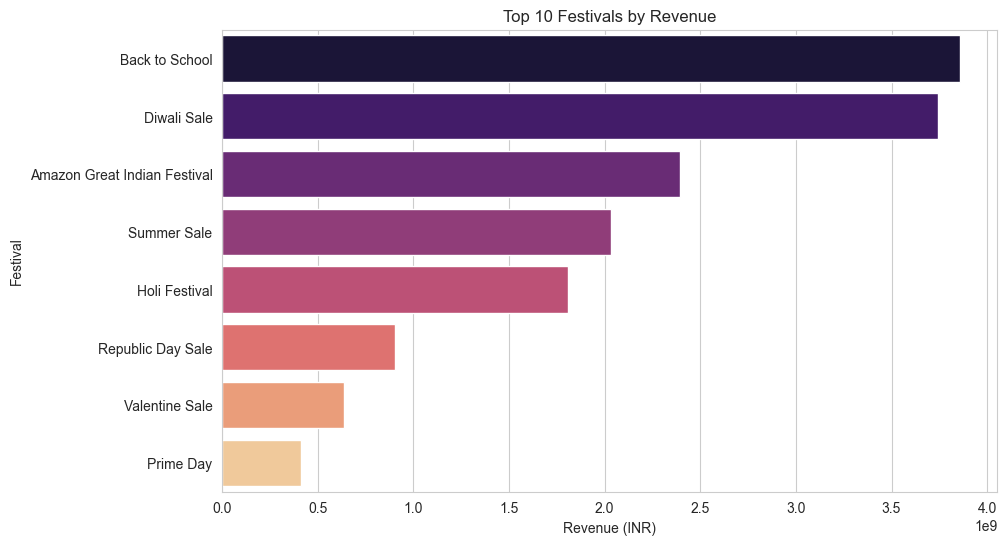

C:\Users\SURYA\AppData\Local\Temp\ipykernel_10832\1689334252.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=festival_discount.values, y=festival_discount.index, palette="coolwarm")


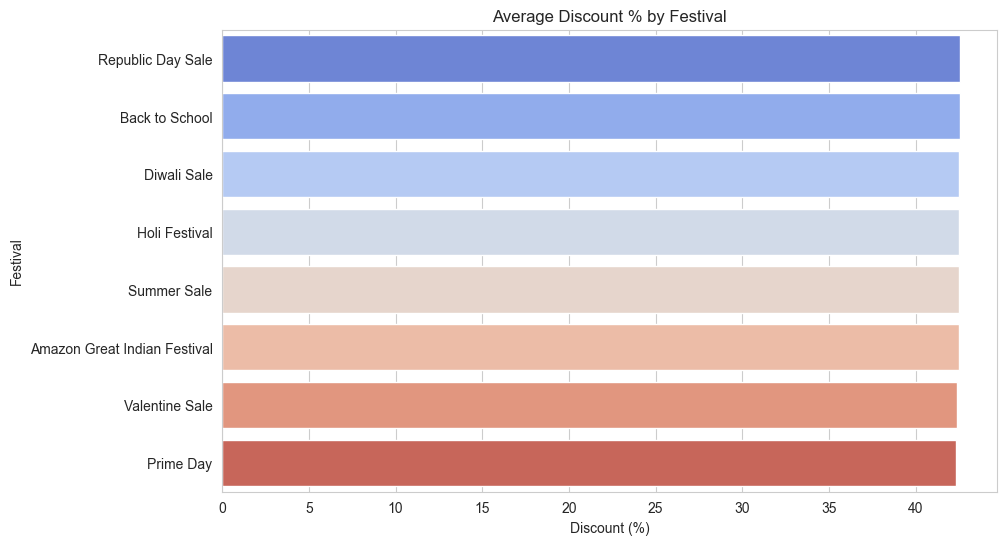

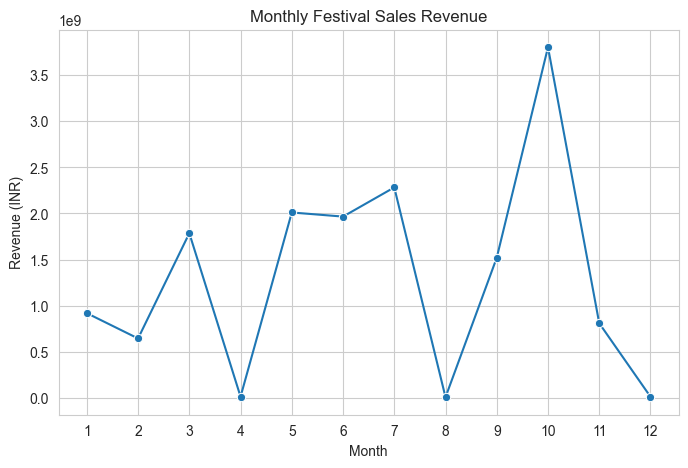

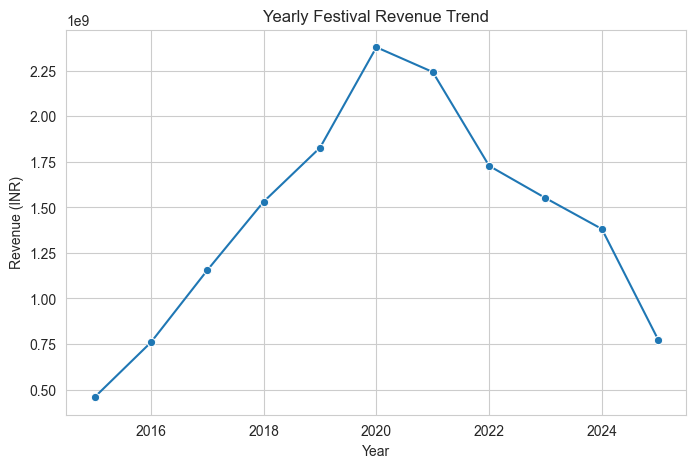

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# ----------------------------
# 1. Load Data
# ----------------------------
df = pd.read_csv(r"C:\code\Amazon_India_Analytics\data\cleaned\amazon_sales_cleaned.csv")

# Convert order_date
df["order_date"] = pd.to_datetime(df["order_date"], errors="coerce")
df = df[df["order_date"].notna()]
df["Year"] = df["order_date"].dt.year
df["Month"] = df["order_date"].dt.month

# Filter festival sales
festival_df = df[df["is_festival_sale"] == 1]

# ----------------------------
# 2. Festival Period Performance (Top 10 Festivals)
# ----------------------------
festival_revenue = festival_df.groupby("festival_name")["final_amount_inr"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=festival_revenue.values, y=festival_revenue.index, palette="magma")
plt.title("Top 10 Festivals by Revenue")
plt.xlabel("Revenue (INR)")
plt.ylabel("Festival")
plt.show()

# ----------------------------
# 3. Campaign/Promotional Impact (Discount Analysis)
# ----------------------------
# Average discount percent during festival sales
festival_discount = festival_df.groupby("festival_name")["discount_percent"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=festival_discount.values, y=festival_discount.index, palette="coolwarm")
plt.title("Average Discount % by Festival")
plt.xlabel("Discount (%)")
plt.ylabel("Festival")
plt.show()

# ----------------------------
# 4. Seasonal Revenue Optimization Insights
# ----------------------------
# Monthly revenue during festival sales
monthly_festival_revenue = festival_df.groupby("Month")["final_amount_inr"].sum().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(data=monthly_festival_revenue, x="Month", y="final_amount_inr", marker="o")
plt.title("Monthly Festival Sales Revenue")
plt.xlabel("Month")
plt.ylabel("Revenue (INR)")
plt.xticks(range(1,13))
plt.show()

# ----------------------------
# 5. Yearly Festival Revenue Trend
# ----------------------------
yearly_festival_revenue = festival_df.groupby("Year")["final_amount_inr"].sum().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(data=yearly_festival_revenue, x="Year", y="final_amount_inr", marker="o")
plt.title("Yearly Festival Revenue Trend")
plt.xlabel("Year")
plt.ylabel("Revenue (INR)")
plt.show()


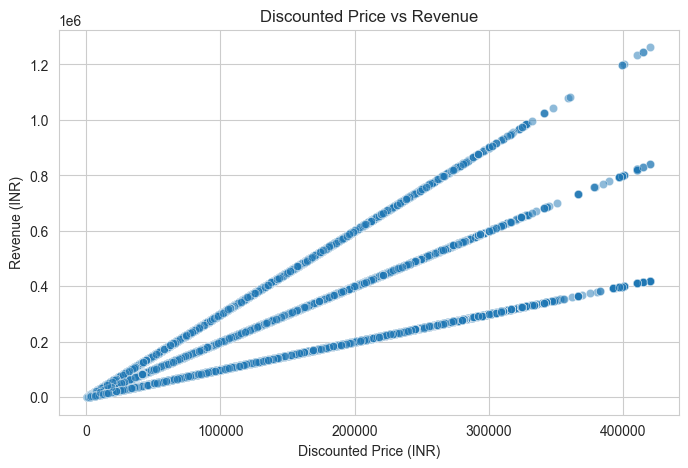

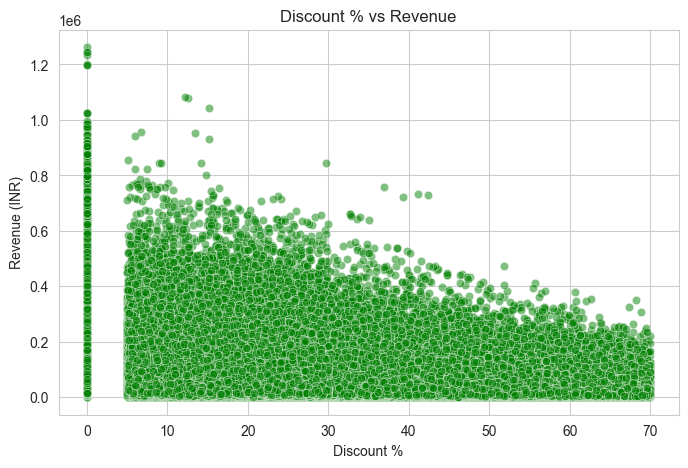

C:\Users\SURYA\AppData\Local\Temp\ipykernel_10832\3079929518.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_price.values, y=category_price.index, palette="coolwarm")


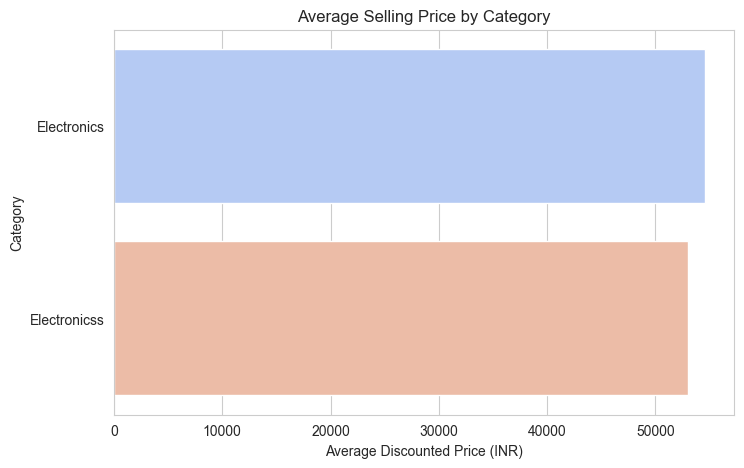

C:\Users\SURYA\AppData\Local\Temp\ipykernel_10832\3079929518.py:60: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_revenue = df.groupby("discount_range")["final_amount_inr"].sum().sort_values(ascending=False)
C:\Users\SURYA\AppData\Local\Temp\ipykernel_10832\3079929518.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=discount_revenue.index, y=discount_revenue.values, palette="viridis")


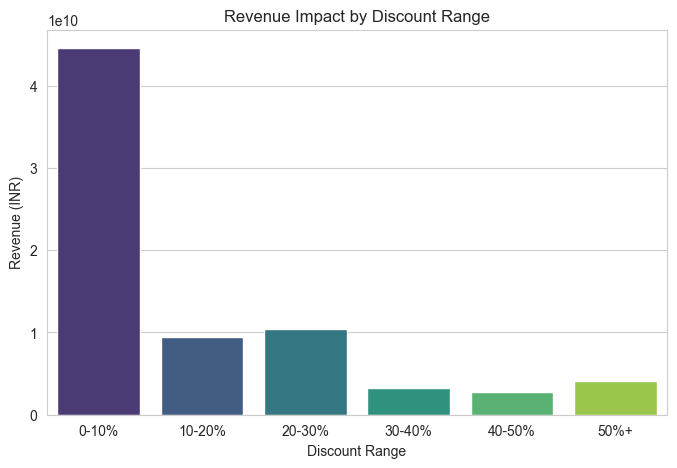

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")

# ----------------------------
# 1. Load Data
# ----------------------------
df = pd.read_csv(r"C:\code\Amazon_India_Analytics\data\cleaned\amazon_sales_cleaned.csv")

# Ensure numeric columns
df["original_price_inr"] = pd.to_numeric(df["original_price_inr"], errors="coerce")
df["discount_percent"] = pd.to_numeric(df["discount_percent"], errors="coerce")
df["discounted_price_inr"] = pd.to_numeric(df["discounted_price_inr"], errors="coerce")
df["final_amount_inr"] = pd.to_numeric(df["final_amount_inr"], errors="coerce")
df = df.dropna(subset=["original_price_inr", "discount_percent", "discounted_price_inr", "final_amount_inr"])

# ----------------------------
# 2. Price vs Revenue
# ----------------------------
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="discounted_price_inr", y="final_amount_inr", alpha=0.5)
plt.title("Discounted Price vs Revenue")
plt.xlabel("Discounted Price (INR)")
plt.ylabel("Revenue (INR)")
plt.show()

# ----------------------------
# 3. Discount Effectiveness
# ----------------------------
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="discount_percent", y="final_amount_inr", alpha=0.5, color="green")
plt.title("Discount % vs Revenue")
plt.xlabel("Discount %")
plt.ylabel("Revenue (INR)")
plt.show()

# ----------------------------
# 4. Average Selling Price by Category
# ----------------------------
category_price = df.groupby("category")["discounted_price_inr"].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=category_price.values, y=category_price.index, palette="coolwarm")
plt.title("Average Selling Price by Category")
plt.xlabel("Average Discounted Price (INR)")
plt.ylabel("Category")
plt.show()

# ----------------------------
# 5. Revenue Impact by Discount Range
# ----------------------------
# Create discount bins
bins = [0,10,20,30,40,50,100]
labels = ["0-10%","10-20%","20-30%","30-40%","40-50%","50%+"]
df["discount_range"] = pd.cut(df["discount_percent"], bins=bins, labels=labels, right=False)

discount_revenue = df.groupby("discount_range")["final_amount_inr"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=discount_revenue.index, y=discount_revenue.values, palette="viridis")
plt.title("Revenue Impact by Discount Range")
plt.xlabel("Discount Range")
plt.ylabel("Revenue (INR)")
plt.show()


C:\Users\SURYA\AppData\Local\Temp\ipykernel_10832\3155266035.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prime_counts.index, y=prime_counts.values, palette="Set1")


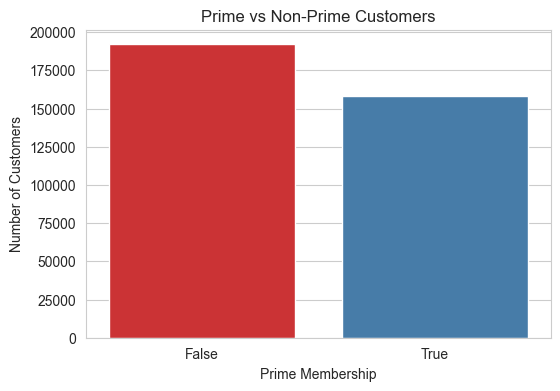

C:\Users\SURYA\AppData\Local\Temp\ipykernel_10832\3155266035.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_prime.index, y=revenue_by_prime.values, palette="Set2")


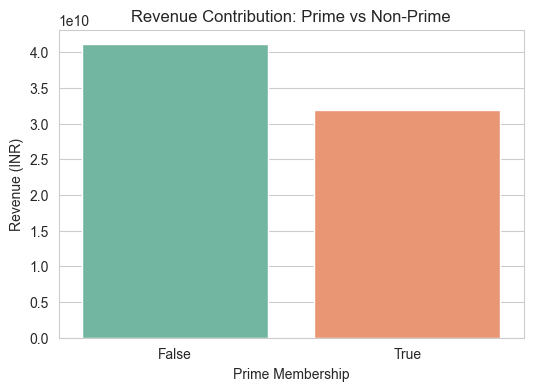

C:\Users\SURYA\AppData\Local\Temp\ipykernel_10832\3155266035.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aov.index, y=aov.values, palette="Set3")


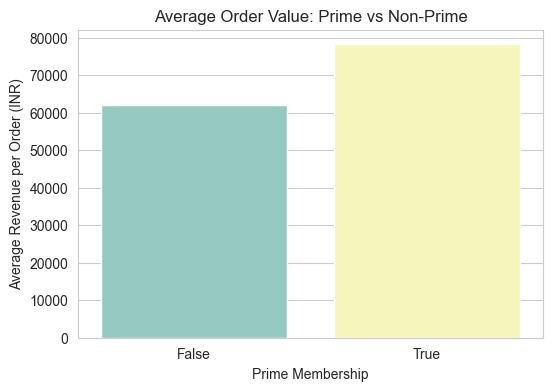

C:\Users\SURYA\AppData\Local\Temp\ipykernel_10832\3155266035.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=retention.index, y=retention.values, palette="coolwarm")


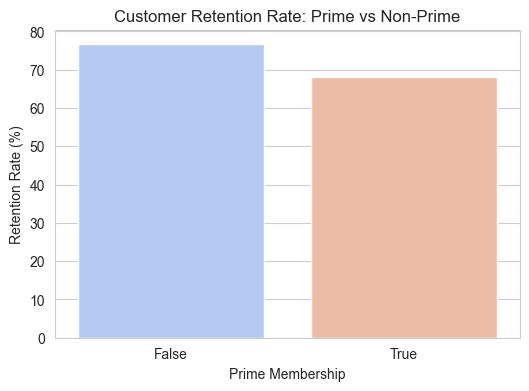

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# ----------------------------
# 1. Load Data
# ----------------------------
df = pd.read_csv(r"C:\code\Amazon_India_Analytics\data\cleaned\amazon_sales_cleaned.csv")

# Ensure date column is datetime
df["order_date"] = pd.to_datetime(df["order_date"], errors="coerce")
df = df[df["order_date"].notna()]

# ----------------------------
# 2. Prime vs Non-Prime Customer Count
# ----------------------------
prime_counts = df.groupby("is_prime_member")["customer_id"].nunique()

plt.figure(figsize=(6,4))
sns.barplot(x=prime_counts.index, y=prime_counts.values, palette="Set1")
plt.title("Prime vs Non-Prime Customers")
plt.xlabel("Prime Membership")
plt.ylabel("Number of Customers")
plt.show()

# ----------------------------
# 3. Revenue Contribution
# ----------------------------
revenue_by_prime = df.groupby("is_prime_member")["final_amount_inr"].sum()

plt.figure(figsize=(6,4))
sns.barplot(x=revenue_by_prime.index, y=revenue_by_prime.values, palette="Set2")
plt.title("Revenue Contribution: Prime vs Non-Prime")
plt.xlabel("Prime Membership")
plt.ylabel("Revenue (INR)")
plt.show()

# ----------------------------
# 4. Average Order Value
# ----------------------------
aov = df.groupby("is_prime_member")["final_amount_inr"].mean()

plt.figure(figsize=(6,4))
sns.barplot(x=aov.index, y=aov.values, palette="Set3")
plt.title("Average Order Value: Prime vs Non-Prime")
plt.xlabel("Prime Membership")
plt.ylabel("Average Revenue per Order (INR)")
plt.show()

# ----------------------------
# 5. Retention Analysis (Repeat Orders)
# ----------------------------
repeat_orders = df.groupby(["customer_id", "is_prime_member"]).size().reset_index(name="order_count")
repeat_orders["repeat"] = repeat_orders["order_count"] > 1

retention = repeat_orders.groupby("is_prime_member")["repeat"].mean() * 100

plt.figure(figsize=(6,4))
sns.barplot(x=retention.index, y=retention.values, palette="coolwarm")
plt.title("Customer Retention Rate: Prime vs Non-Prime")
plt.xlabel("Prime Membership")
plt.ylabel("Retention Rate (%)")
plt.show()


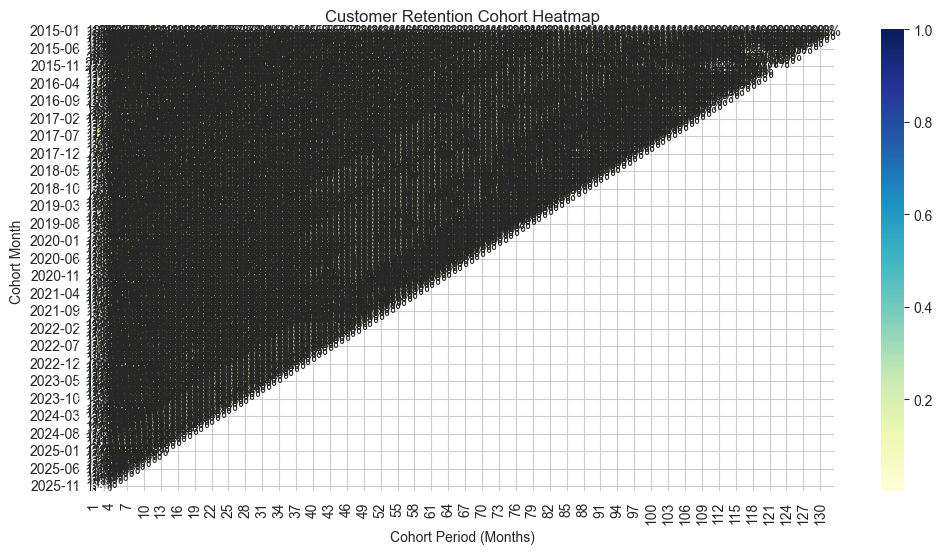

Estimated Churn Rate: 27.24%


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# ----------------------------
# 1. Load Data
# ----------------------------
df = pd.read_csv(r"C:\code\Amazon_India_Analytics\data\cleaned\amazon_sales_cleaned.csv")

# Convert order_date
df["order_date"] = pd.to_datetime(df["order_date"], errors="coerce")
df = df[df["order_date"].notna()]

# ----------------------------
# 2. Cohort Analysis Setup
# ----------------------------
# Assign each customer their first purchase month
df['order_month'] = df['order_date'].dt.to_period('M')
first_purchase = df.groupby('customer_id')['order_date'].min().dt.to_period('M')
df['cohort_month'] = df['customer_id'].map(first_purchase)

# ----------------------------
# 3. Calculate Cohort Period
# ----------------------------
df['cohort_index'] = (df['order_month'].astype('datetime64[ns]').dt.year - df['cohort_month'].astype('datetime64[ns]').dt.year)*12 + \
                     (df['order_month'].astype('datetime64[ns]').dt.month - df['cohort_month'].astype('datetime64[ns]').dt.month) + 1

# ----------------------------
# 4. Cohort Retention Table
# ----------------------------
cohort_data = df.groupby(['cohort_month', 'cohort_index'])['customer_id'].nunique().reset_index()
cohort_counts = cohort_data.pivot(index='cohort_month', columns='cohort_index', values='customer_id')

# Normalize to get retention rate
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)

# ----------------------------
# 5. Plot Cohort Retention Heatmap
# ----------------------------
plt.figure(figsize=(12,6))
sns.heatmap(retention, annot=True, fmt=".0%", cmap="YlGnBu")
plt.title("Customer Retention Cohort Heatmap")
plt.xlabel("Cohort Period (Months)")
plt.ylabel("Cohort Month")
plt.show()

# ----------------------------
# 6. Simple Churn Analysis
# ----------------------------
# Customers with only 1 order are considered churned
churned = df.groupby('customer_id').size().reset_index(name='orders')
churn_rate = (churned['orders'] == 1).mean() * 100

print(f"Estimated Churn Rate: {churn_rate:.2f}%")


C:\Users\SURYA\AppData\Local\Temp\ipykernel_10832\1877222242.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_revenue.index, y=age_group_revenue.values, palette="viridis")


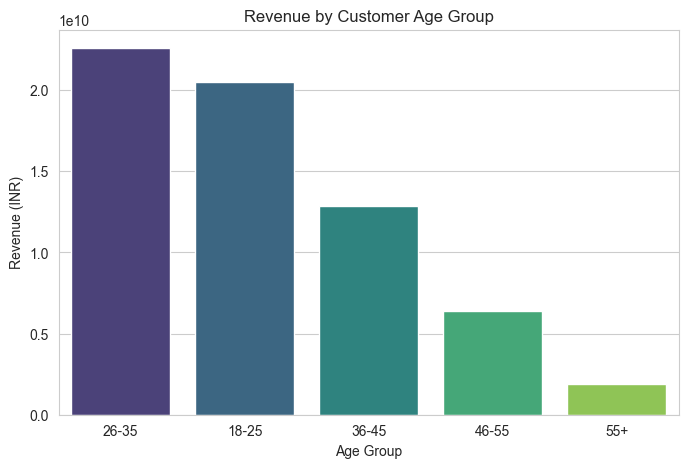

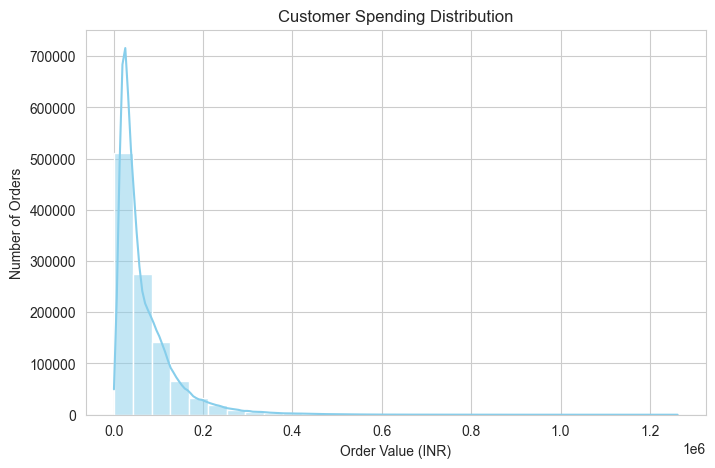

C:\Users\SURYA\AppData\Local\Temp\ipykernel_10832\1877222242.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_revenue.values, y=state_revenue.index, palette="magma")


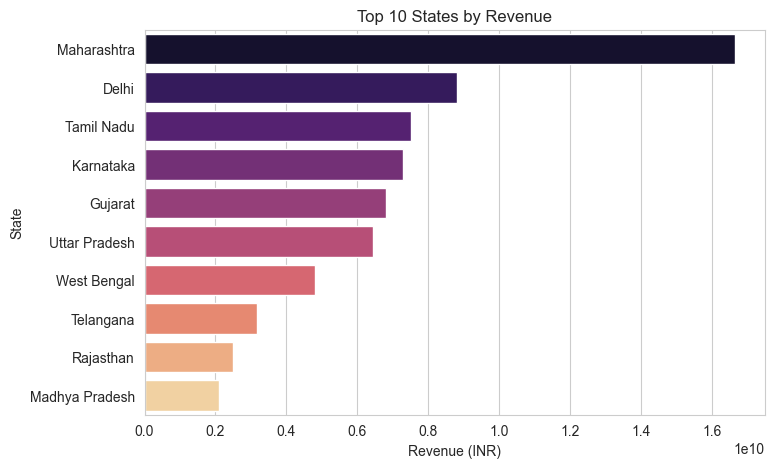

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# ----------------------------
# 1. Load Data
# ----------------------------
df = pd.read_csv(r"C:\code\Amazon_India_Analytics\data\cleaned\amazon_sales_cleaned.csv")

# Ensure numeric and datetime columns
df["final_amount_inr"] = pd.to_numeric(df["final_amount_inr"], errors="coerce")
df["order_date"] = pd.to_datetime(df["order_date"], errors="coerce")
df = df[df["order_date"].notna()]

# ----------------------------
# 2. Age Group Preferences
# ----------------------------
age_group_revenue = df.groupby("customer_age_group")["final_amount_inr"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=age_group_revenue.index, y=age_group_revenue.values, palette="viridis")
plt.title("Revenue by Customer Age Group")
plt.xlabel("Age Group")
plt.ylabel("Revenue (INR)")
plt.show()

# ----------------------------
# 3. Spending Patterns
# ----------------------------
plt.figure(figsize=(8,5))
sns.histplot(df["final_amount_inr"], bins=30, kde=True, color="skyblue")
plt.title("Customer Spending Distribution")
plt.xlabel("Order Value (INR)")
plt.ylabel("Number of Orders")
plt.show()

# ----------------------------
# 4. Geographic Behavior - Top States
# ----------------------------
state_revenue = df.groupby("customer_state")["final_amount_inr"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=state_revenue.values, y=state_revenue.index, palette="magma")
plt.title("Top 10 States by Revenue")
plt.xlabel("Revenue (INR)")
plt.ylabel("State")
plt.show()


C:\Users\SURYA\AppData\Local\Temp\ipykernel_10832\2861008999.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_revenue.values, y=top_revenue.index, palette="viridis")


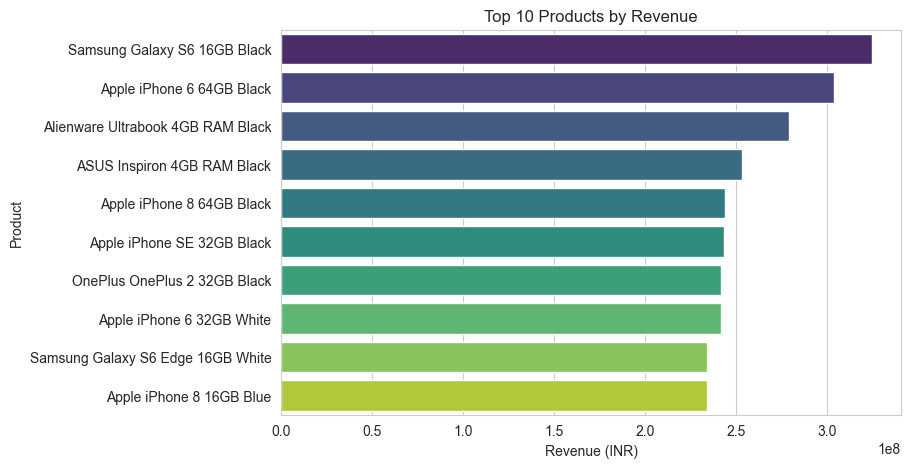

C:\Users\SURYA\AppData\Local\Temp\ipykernel_10832\2861008999.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_units.values, y=top_units.index, palette="coolwarm")


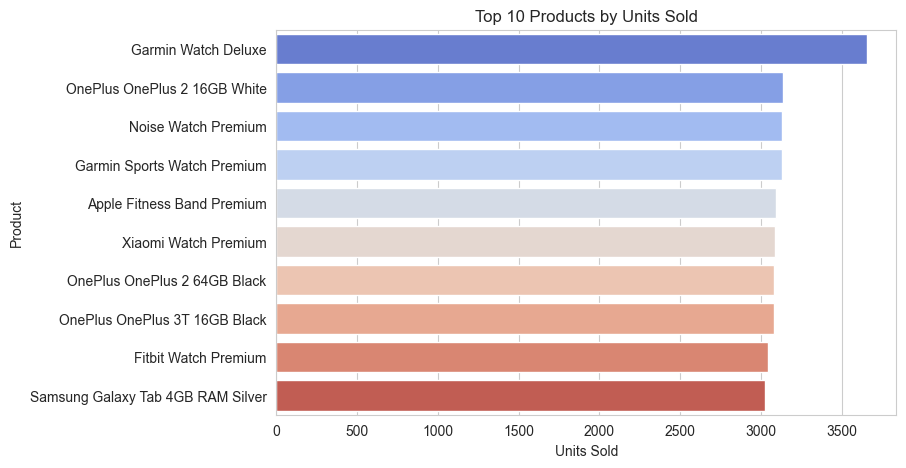

C:\Users\SURYA\AppData\Local\Temp\ipykernel_10832\2861008999.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_ratings.values, y=top_ratings.index, palette="magma")


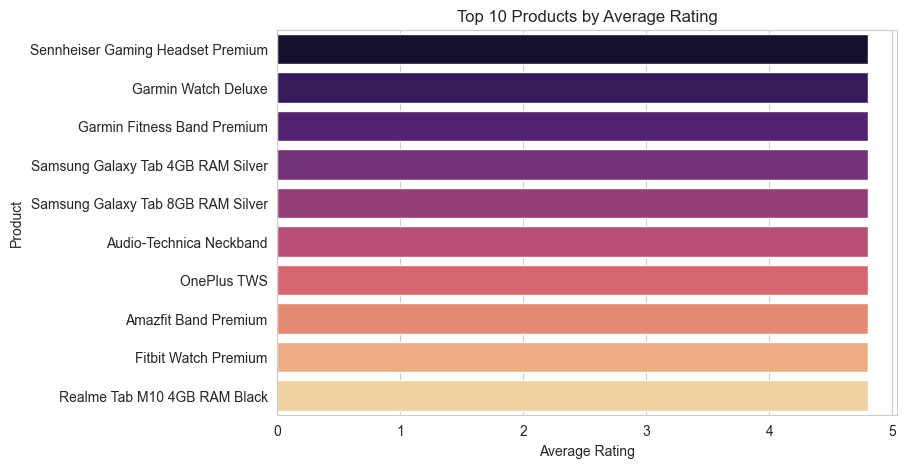

C:\Users\SURYA\AppData\Local\Temp\ipykernel_10832\2861008999.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=return_rate.values, y=return_rate.index, palette="Set2")


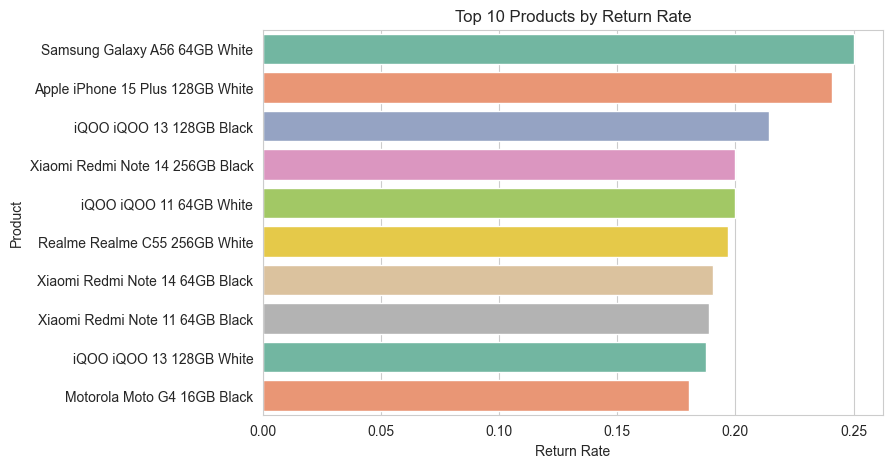

C:\Users\SURYA\AppData\Local\Temp\ipykernel_10832\2861008999.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_revenue.values, y=category_revenue.index, palette="viridis")


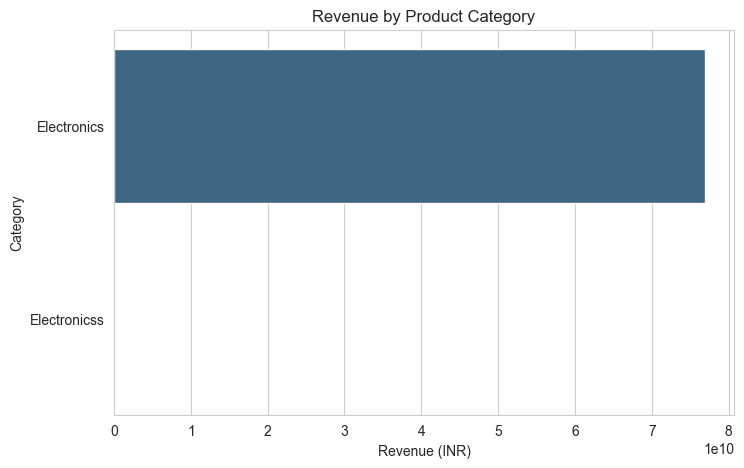

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# ----------------------------
# 1. Load Data
# ----------------------------
df = pd.read_csv(r"C:\code\Amazon_India_Analytics\data\cleaned\amazon_sales_cleaned.csv")

# Ensure numeric columns
df["final_amount_inr"] = pd.to_numeric(df["final_amount_inr"], errors="coerce")
df["quantity"] = pd.to_numeric(df["quantity"], errors="coerce")
df["product_rating"] = pd.to_numeric(df["product_rating"], errors="coerce")

# ----------------------------
# 2. Top Products by Revenue
# ----------------------------
top_revenue = df.groupby("product_name")["final_amount_inr"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_revenue.values, y=top_revenue.index, palette="viridis")
plt.title("Top 10 Products by Revenue")
plt.xlabel("Revenue (INR)")
plt.ylabel("Product")
plt.show()

# ----------------------------
# 3. Top Products by Units Sold
# ----------------------------
top_units = df.groupby("product_name")["quantity"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_units.values, y=top_units.index, palette="coolwarm")
plt.title("Top 10 Products by Units Sold")
plt.xlabel("Units Sold")
plt.ylabel("Product")
plt.show()

# ----------------------------
# 4. Average Product Ratings
# ----------------------------
top_ratings = df.groupby("product_name")["product_rating"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_ratings.values, y=top_ratings.index, palette="magma")
plt.title("Top 10 Products by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Product")
plt.show()

# ----------------------------
# 5. Return Rate by Product
# ----------------------------
df["is_returned"] = df["return_status"].apply(lambda x: 1 if x=="Returned" else 0)
return_rate = df.groupby("product_name")["is_returned"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=return_rate.values, y=return_rate.index, palette="Set2")
plt.title("Top 10 Products by Return Rate")
plt.xlabel("Return Rate")
plt.ylabel("Product")
plt.show()

# ----------------------------
# 6. Category-wise Revenue
# ----------------------------
category_revenue = df.groupby("category")["final_amount_inr"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=category_revenue.values, y=category_revenue.index, palette="viridis")
plt.title("Revenue by Product Category")
plt.xlabel("Revenue (INR)")
plt.ylabel("Category")
plt.show()


C:\Users\SURYA\AppData\Local\Temp\ipykernel_10832\3980709427.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_revenue.values, y=brand_revenue.index, palette="viridis")


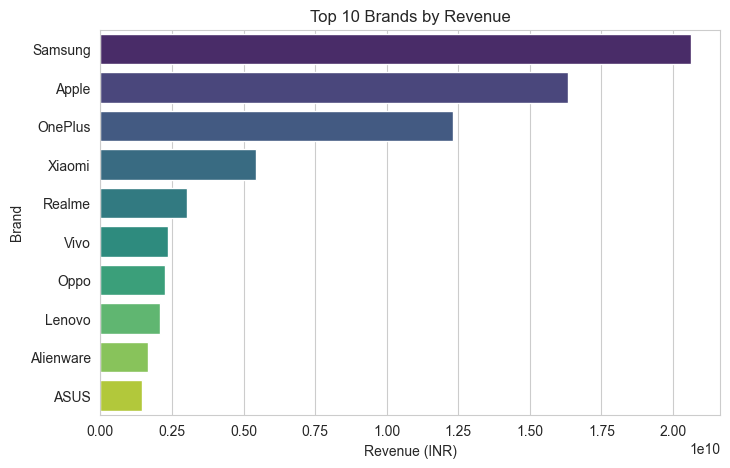

C:\Users\SURYA\AppData\Local\Temp\ipykernel_10832\3980709427.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_units.values, y=brand_units.index, palette="coolwarm")


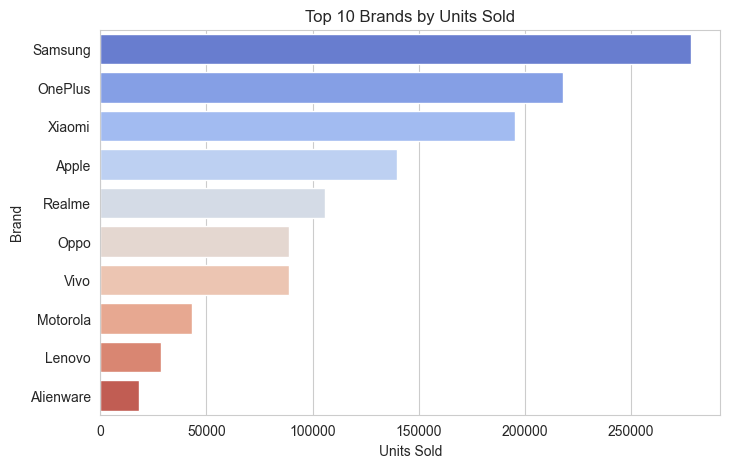

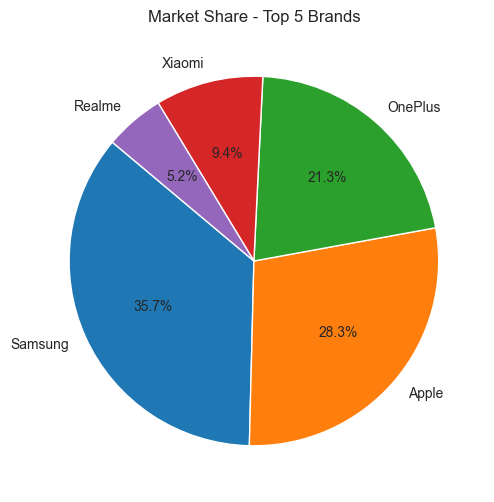

C:\Users\SURYA\AppData\Local\Temp\ipykernel_10832\3980709427.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_aov.values, y=brand_aov.index, palette="magma")


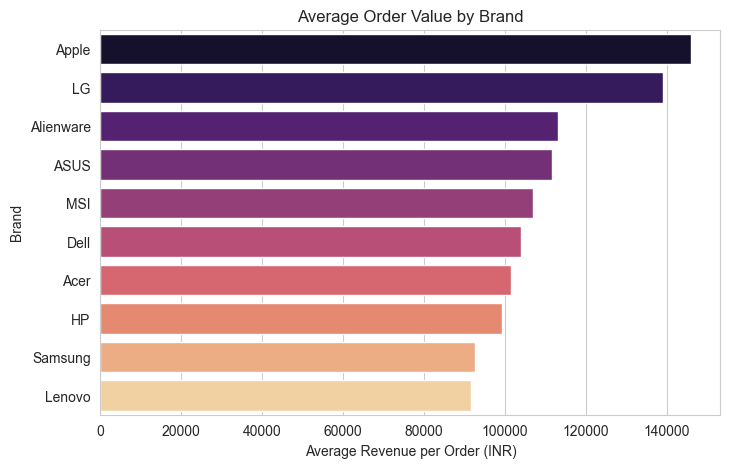

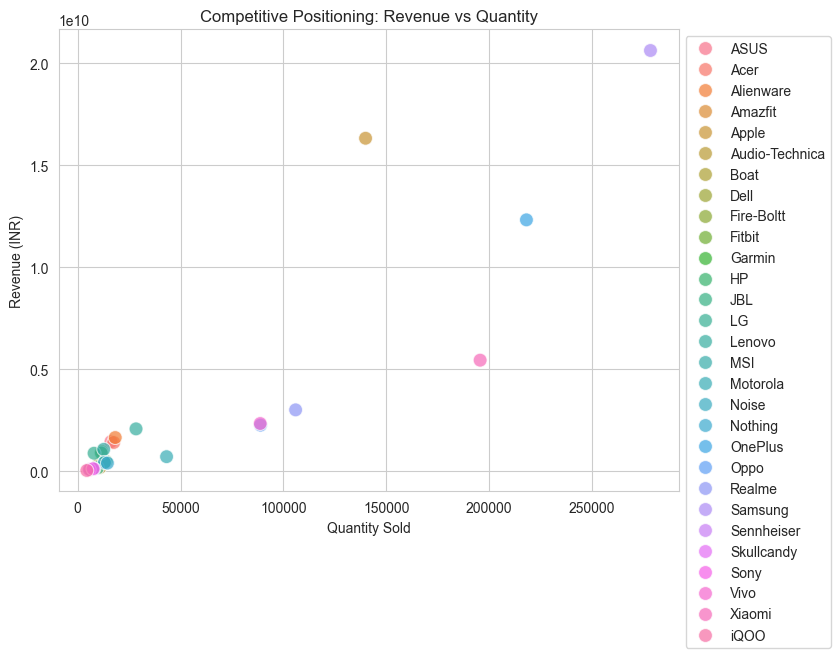

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# ----------------------------
# 1. Load Data
# ----------------------------
df = pd.read_csv(r"C:\code\Amazon_India_Analytics\data\cleaned\amazon_sales_cleaned.csv")

# Ensure numeric columns
df["final_amount_inr"] = pd.to_numeric(df["final_amount_inr"], errors="coerce")
df["quantity"] = pd.to_numeric(df["quantity"], errors="coerce")

# ----------------------------
# 2. Brand Revenue
# ----------------------------
brand_revenue = df.groupby("brand")["final_amount_inr"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=brand_revenue.values, y=brand_revenue.index, palette="viridis")
plt.title("Top 10 Brands by Revenue")
plt.xlabel("Revenue (INR)")
plt.ylabel("Brand")
plt.show()

# ----------------------------
# 3. Brand Units Sold
# ----------------------------
brand_units = df.groupby("brand")["quantity"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=brand_units.values, y=brand_units.index, palette="coolwarm")
plt.title("Top 10 Brands by Units Sold")
plt.xlabel("Units Sold")
plt.ylabel("Brand")
plt.show()

# ----------------------------
# 4. Market Share Pie Chart (Top 5 Brands)
# ----------------------------
top5_brands = brand_revenue.head(5)
plt.figure(figsize=(6,6))
plt.pie(top5_brands, labels=top5_brands.index, autopct="%1.1f%%", startangle=140)
plt.title("Market Share - Top 5 Brands")
plt.show()

# ----------------------------
# 5. Customer Preferences by Brand (Average Order Value)
# ----------------------------
brand_aov = df.groupby("brand")["final_amount_inr"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=brand_aov.values, y=brand_aov.index, palette="magma")
plt.title("Average Order Value by Brand")
plt.xlabel("Average Revenue per Order (INR)")
plt.ylabel("Brand")
plt.show()

# ----------------------------
# 6. Competitive Positioning (Revenue vs Quantity)
# ----------------------------
brand_perf = df.groupby("brand")[["final_amount_inr","quantity"]].sum().reset_index()

plt.figure(figsize=(8,6))
sns.scatterplot(data=brand_perf, x="quantity", y="final_amount_inr", hue="brand", s=100, alpha=0.7)
plt.title("Competitive Positioning: Revenue vs Quantity")
plt.xlabel("Quantity Sold")
plt.ylabel("Revenue (INR)")
plt.legend(bbox_to_anchor=(1,1))
plt.show()


C:\Users\SURYA\AppData\Local\Temp\ipykernel_10832\716682300.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")


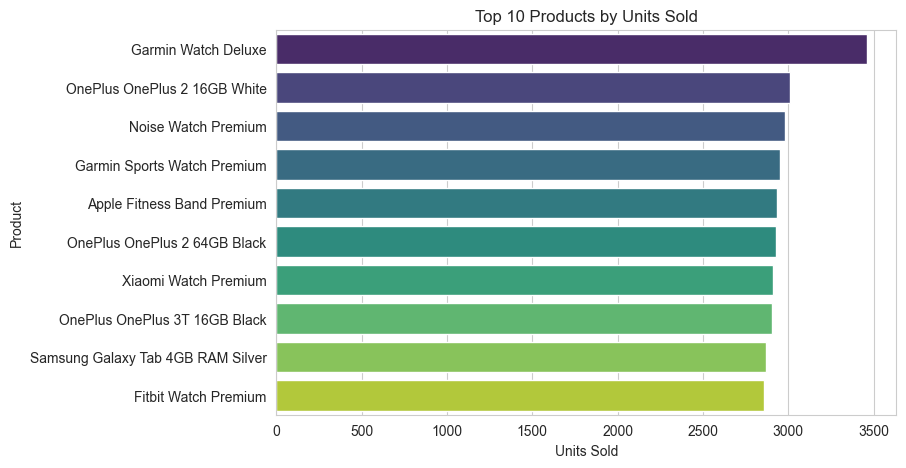

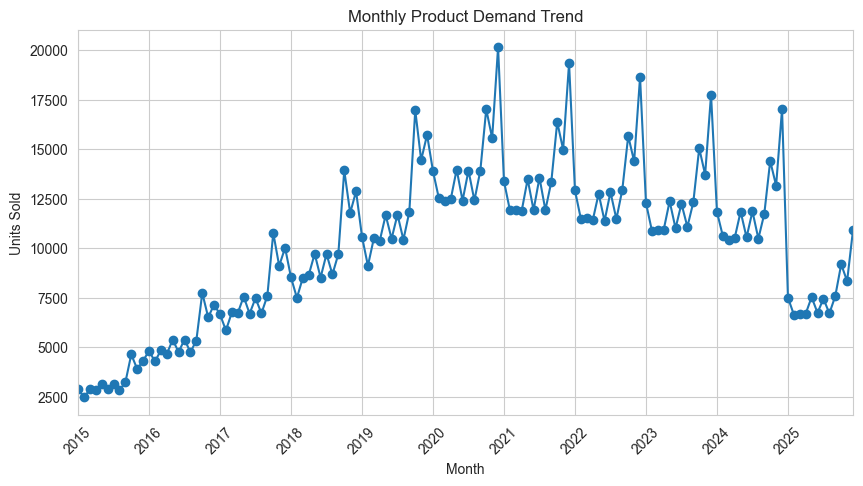

C:\Users\SURYA\AppData\Local\Temp\ipykernel_10832\716682300.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_turnover.values, y=top_turnover.index, palette="coolwarm")


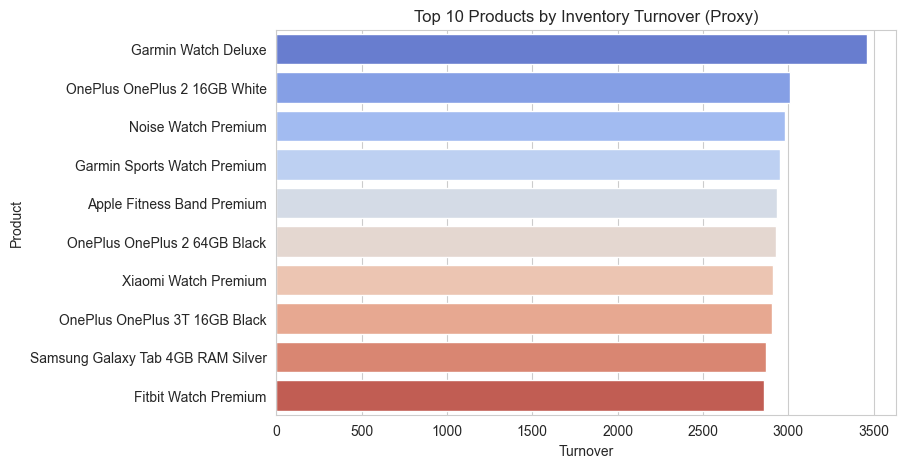

Simple forecast for next month: 9489 units


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# ----------------------------
# 1. Load Data
# ----------------------------
df = pd.read_csv(r"C:\code\Amazon_India_Analytics\data\cleaned\amazon_sales_cleaned.csv")

# Ensure numeric and datetime columns
df["quantity"] = pd.to_numeric(df["quantity"], errors="coerce")
df["final_amount_inr"] = pd.to_numeric(df["final_amount_inr"], errors="coerce")
df["order_date"] = pd.to_datetime(df["order_date"], errors="coerce")
df = df[df["order_date"].notna()]

# ----------------------------
# 2. Product Demand Patterns (Top 10 Products by Units Sold)
# ----------------------------
top_products = df.groupby("product_name")["quantity"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 10 Products by Units Sold")
plt.xlabel("Units Sold")
plt.ylabel("Product")
plt.show()

# ----------------------------
# 3. Seasonal Trends (Monthly Demand)
# ----------------------------
df['order_month'] = df['order_date'].dt.to_period('M')
monthly_demand = df.groupby('order_month')["quantity"].sum()

plt.figure(figsize=(10,5))
monthly_demand.plot(marker='o')
plt.title("Monthly Product Demand Trend")
plt.xlabel("Month")
plt.ylabel("Units Sold")
plt.xticks(rotation=45)
plt.show()

# ----------------------------
# 4. Inventory Turnover (Simple Proxy)
# ----------------------------
# Assume quantity sold / number of unique products as a simple turnover proxy
turnover = df.groupby("product_name")["quantity"].sum() / df.groupby("product_name")["product_id"].nunique()
top_turnover = turnover.sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_turnover.values, y=top_turnover.index, palette="coolwarm")
plt.title("Top 10 Products by Inventory Turnover (Proxy)")
plt.xlabel("Turnover")
plt.ylabel("Product")
plt.show()

# ----------------------------
# 5. Simple Demand Forecast (Next 3 Months)
# ----------------------------
# Use average of last 3 months as a simple forecast
monthly_demand_df = monthly_demand.reset_index()
forecast = monthly_demand_df['quantity'].tail(3).mean()
print(f"Simple forecast for next month: {forecast:.0f} units")


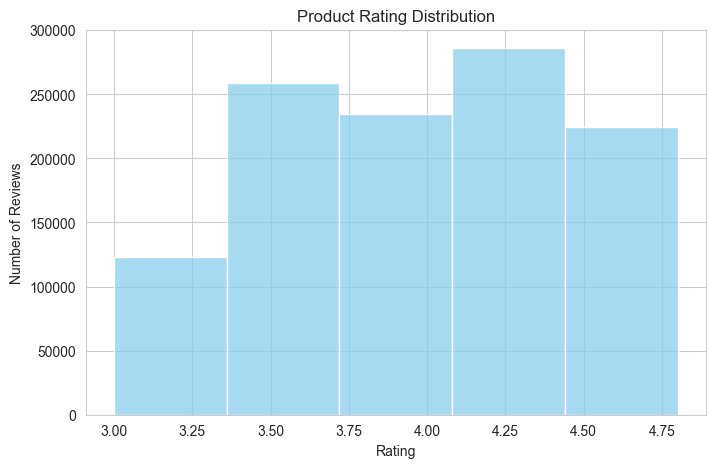

C:\Users\SURYA\AppData\Local\Temp\ipykernel_10832\2166731189.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rated.values, y=top_rated.index, palette="magma")


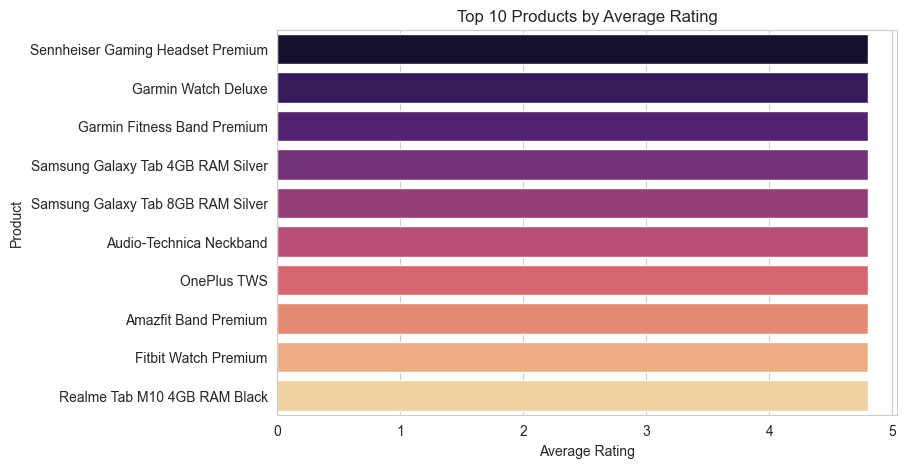

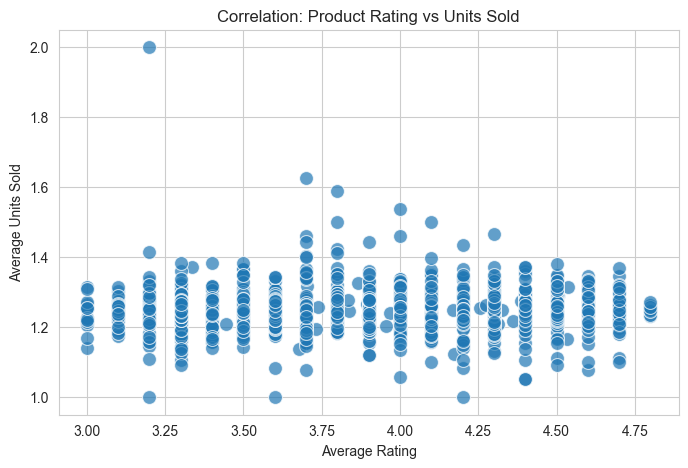

C:\Users\SURYA\AppData\Local\Temp\ipykernel_10832\2166731189.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_rating.values, y=category_rating.index, palette="coolwarm")


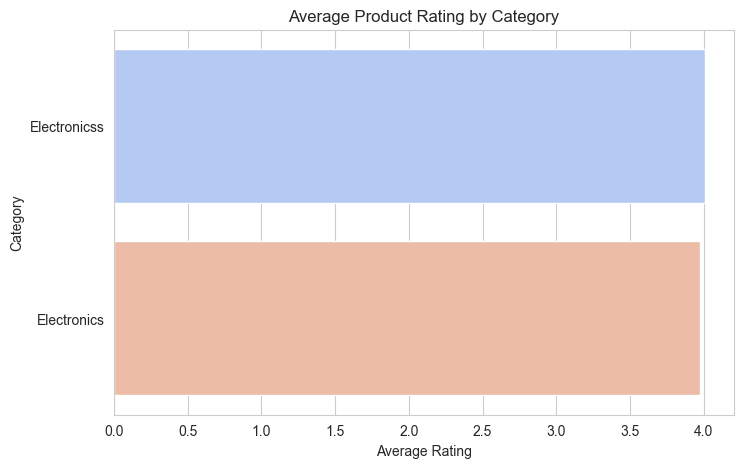

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# ----------------------------
# 1. Load Data
# ----------------------------
df = pd.read_csv(r"C:\code\Amazon_India_Analytics\data\cleaned\amazon_sales_cleaned.csv")

# Ensure numeric columns
df["product_rating"] = pd.to_numeric(df["product_rating"], errors="coerce")
df["final_amount_inr"] = pd.to_numeric(df["final_amount_inr"], errors="coerce")
df["quantity"] = pd.to_numeric(df["quantity"], errors="coerce")

# ----------------------------
# 2. Rating Distribution
# ----------------------------
plt.figure(figsize=(8,5))
sns.histplot(df["product_rating"].dropna(), bins=5, kde=False, color="skyblue")
plt.title("Product Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.show()

# ----------------------------
# 3. Average Rating by Product (Top 10 Products)
# ----------------------------
top_rated = df.groupby("product_name")["product_rating"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_rated.values, y=top_rated.index, palette="magma")
plt.title("Top 10 Products by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Product")
plt.show()

# ----------------------------
# 4. Correlation Between Rating and Sales
# ----------------------------
product_perf = df.groupby("product_name")[["product_rating","quantity","final_amount_inr"]].mean().reset_index()

plt.figure(figsize=(8,5))
sns.scatterplot(data=product_perf, x="product_rating", y="quantity", s=100, alpha=0.7)
plt.title("Correlation: Product Rating vs Units Sold")
plt.xlabel("Average Rating")
plt.ylabel("Average Units Sold")
plt.show()

# ----------------------------
# 5. Category-wise Average Rating
# ----------------------------
category_rating = df.groupby("category")["product_rating"].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=category_rating.values, y=category_rating.index, palette="coolwarm")
plt.title("Average Product Rating by Category")
plt.xlabel("Average Rating")
plt.ylabel("Category")
plt.show()


New Products Launched in 2025: 1974


C:\Users\SURYA\AppData\Local\Temp\ipykernel_10832\1358175867.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=new_product_perf["final_amount_inr"], y=new_product_perf.index, palette="viridis")


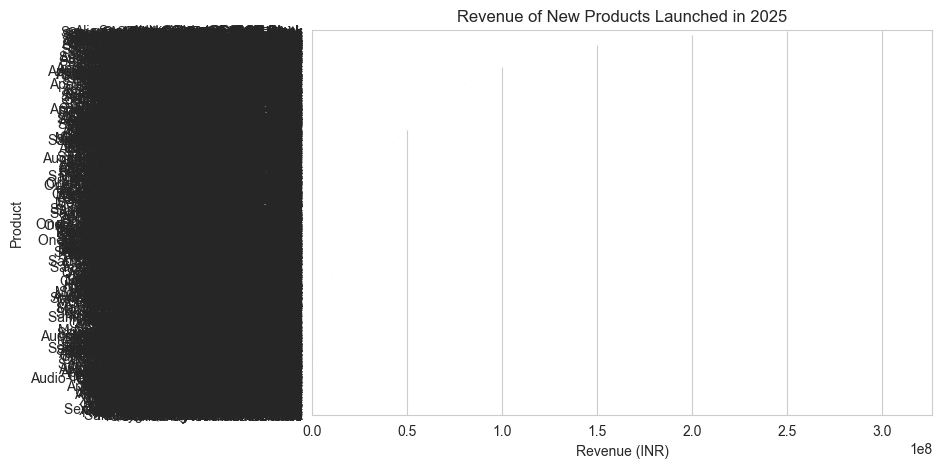

C:\Users\SURYA\AppData\Local\Temp\ipykernel_10832\1358175867.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=new_product_perf["quantity"], y=new_product_perf.index, palette="coolwarm")


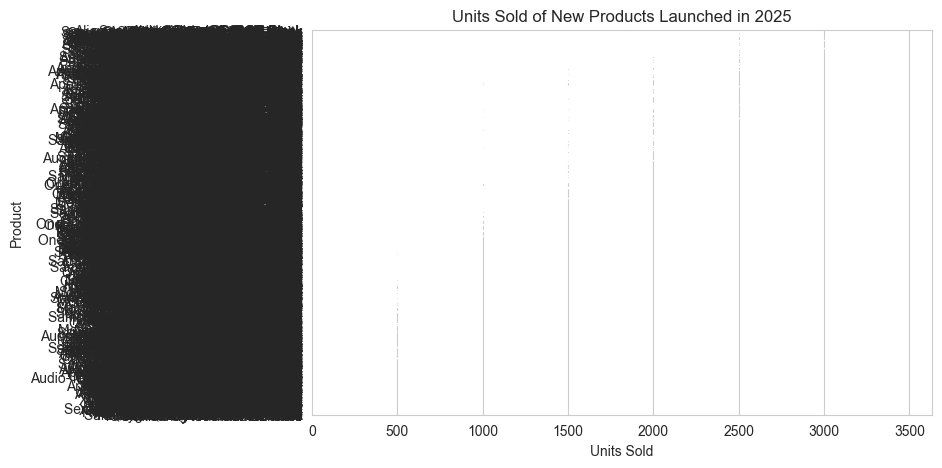

C:\Users\SURYA\AppData\Local\Temp\ipykernel_10832\1358175867.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=new_product_rating.values, y=new_product_rating.index, palette="magma")


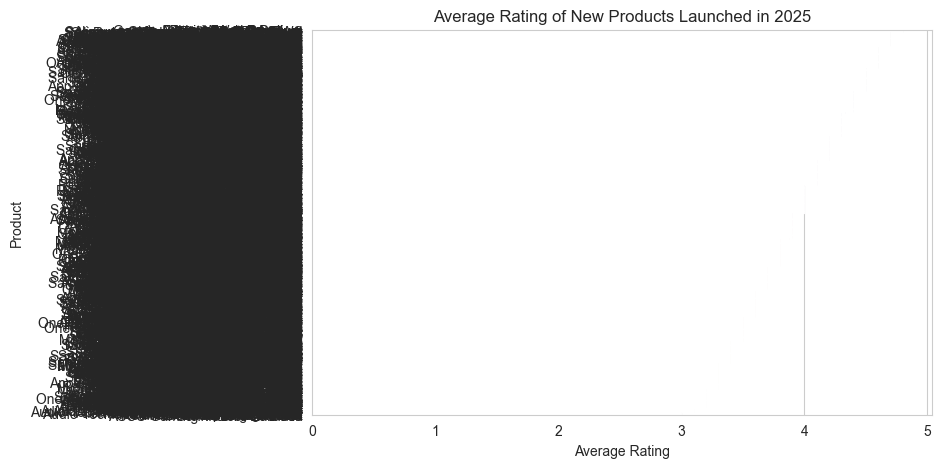

Market Acceptance Rate for New Products: 50.00%


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# ----------------------------
# 1. Load Data
# ----------------------------
df = pd.read_csv(r"C:\code\Amazon_India_Analytics\data\cleaned\amazon_sales_cleaned.csv")

# Ensure numeric columns and dates
df["final_amount_inr"] = pd.to_numeric(df["final_amount_inr"], errors="coerce")
df["quantity"] = pd.to_numeric(df["quantity"], errors="coerce")
df["order_date"] = pd.to_datetime(df["order_date"], errors="coerce")
df = df[df["order_date"].notna()]

# ----------------------------
# 2. Identify New Products (Launched in Last Year)
# ----------------------------
latest_year = df["order_date"].dt.year.max()
new_products = df[df["order_date"].dt.year == latest_year]["product_name"].unique()

print(f"New Products Launched in {latest_year}: {len(new_products)}")

# ----------------------------
# 3. Revenue and Units Sold for New Products
# ----------------------------
new_product_perf = df[df["product_name"].isin(new_products)].groupby("product_name")[["final_amount_inr","quantity"]].sum().sort_values("final_amount_inr", ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=new_product_perf["final_amount_inr"], y=new_product_perf.index, palette="viridis")
plt.title(f"Revenue of New Products Launched in {latest_year}")
plt.xlabel("Revenue (INR)")
plt.ylabel("Product")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x=new_product_perf["quantity"], y=new_product_perf.index, palette="coolwarm")
plt.title(f"Units Sold of New Products Launched in {latest_year}")
plt.xlabel("Units Sold")
plt.ylabel("Product")
plt.show()

# ----------------------------
# 4. Average Rating for New Products
# ----------------------------
new_product_rating = df[df["product_name"].isin(new_products)].groupby("product_name")["product_rating"].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=new_product_rating.values, y=new_product_rating.index, palette="magma")
plt.title(f"Average Rating of New Products Launched in {latest_year}")
plt.xlabel("Average Rating")
plt.ylabel("Product")
plt.show()

# ----------------------------
# 5. Simple Market Acceptance Metric
# ----------------------------
# Proportion of new products with revenue > median revenue
median_revenue = df.groupby("product_name")["final_amount_inr"].sum().median()
accepted = (new_product_perf["final_amount_inr"] > median_revenue).mean() * 100

print(f"Market Acceptance Rate for New Products: {accepted:.2f}%")


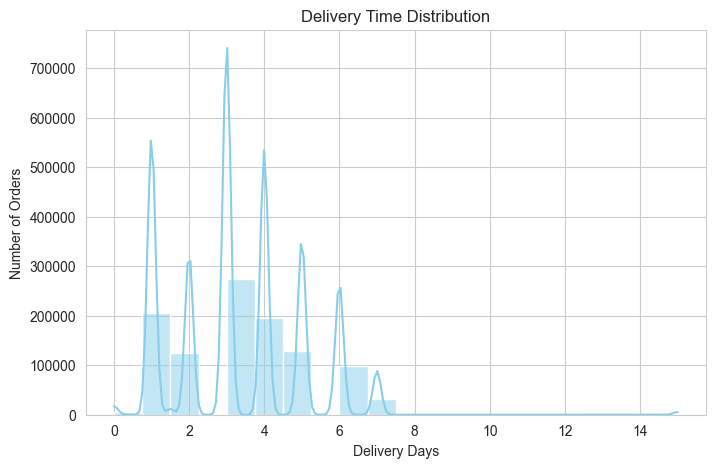

Overall On-Time Delivery Rate: 87.47%


C:\Users\SURYA\AppData\Local\Temp\ipykernel_10832\1785462378.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_delivery.values, y=state_delivery.index, palette="viridis")


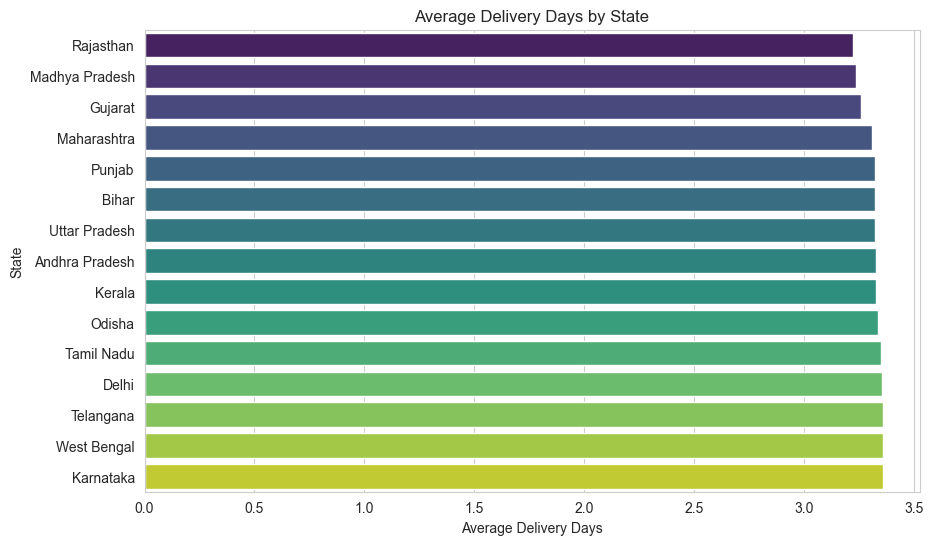

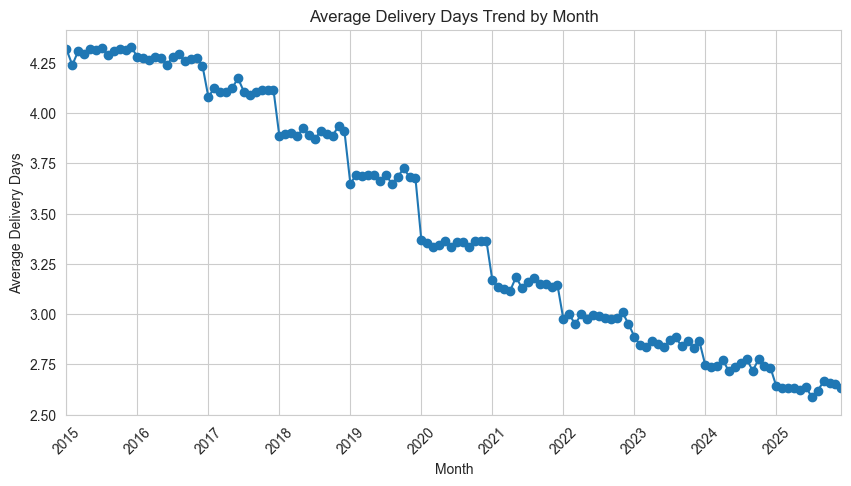

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# ----------------------------
# 1. Load Data
# ----------------------------
df = pd.read_csv(r"C:\code\Amazon_India_Analytics\data\cleaned\amazon_sales_cleaned.csv")

# Ensure numeric and datetime columns
df["delivery_days"] = pd.to_numeric(df["delivery_days"], errors="coerce")
df["order_date"] = pd.to_datetime(df["order_date"], errors="coerce")
df = df[df["order_date"].notna()]

# ----------------------------
# 2. Delivery Time Distribution
# ----------------------------
plt.figure(figsize=(8,5))
sns.histplot(df["delivery_days"].dropna(), bins=20, kde=True, color="skyblue")
plt.title("Delivery Time Distribution")
plt.xlabel("Delivery Days")
plt.ylabel("Number of Orders")
plt.show()

# ----------------------------
# 3. On-Time Delivery Rate
# ----------------------------
# Assuming delivery <= 5 days is on-time (example threshold)
df["on_time"] = df["delivery_days"] <= 5
on_time_rate = df["on_time"].mean() * 100

print(f"Overall On-Time Delivery Rate: {on_time_rate:.2f}%")

# ----------------------------
# 4. Average Delivery Days by State
# ----------------------------
state_delivery = df.groupby("customer_state")["delivery_days"].mean().sort_values()

plt.figure(figsize=(10,6))
sns.barplot(x=state_delivery.values, y=state_delivery.index, palette="viridis")
plt.title("Average Delivery Days by State")
plt.xlabel("Average Delivery Days")
plt.ylabel("State")
plt.show()

# ----------------------------
# 5. Delivery Efficiency by Month
# ----------------------------
df['order_month'] = df['order_date'].dt.to_period('M')
monthly_delivery = df.groupby('order_month')["delivery_days"].mean()

plt.figure(figsize=(10,5))
monthly_delivery.plot(marker='o')
plt.title("Average Delivery Days Trend by Month")
plt.xlabel("Month")
plt.ylabel("Average Delivery Days")
plt.xticks(rotation=45)
plt.show()


Overall Return Rate: 7.02%
Total Cost Impact of Returns: INR 4923170487.11


C:\Users\SURYA\AppData\Local\Temp\ipykernel_10832\1101626552.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_return.values, y=category_return.index, palette="coolwarm")


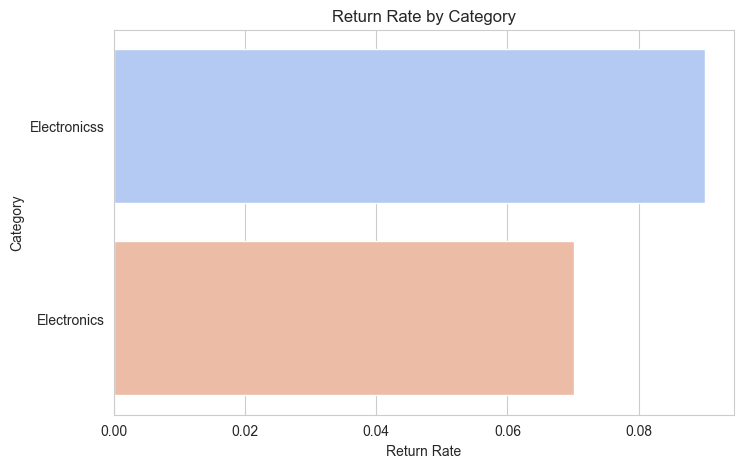

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# ----------------------------
# 1. Load Data
# ----------------------------
df = pd.read_csv(r"C:\code\Amazon_India_Analytics\data\cleaned\amazon_sales_cleaned.csv")

# Ensure numeric columns
df["final_amount_inr"] = pd.to_numeric(df["final_amount_inr"], errors="coerce")
df["quantity"] = pd.to_numeric(df["quantity"], errors="coerce")

# ----------------------------
# 2. Overall Return Rate
# ----------------------------
df["is_returned"] = df["return_status"].apply(lambda x: 1 if x=="Returned" else 0)
overall_return_rate = df["is_returned"].mean() * 100
print(f"Overall Return Rate: {overall_return_rate:.2f}%")

# ----------------------------
# 3. Top Return Reasons (if column exists, else skip)
# ----------------------------
if "return_reason" in df.columns:
    top_reasons = df[df["is_returned"]==1]["return_reason"].value_counts().head(10)
    plt.figure(figsize=(8,5))
    sns.barplot(x=top_reasons.values, y=top_reasons.index, palette="magma")
    plt.title("Top 10 Return Reasons")
    plt.xlabel("Number of Returns")
    plt.ylabel("Reason")
    plt.show()

# ----------------------------
# 4. Cost Impact of Returns
# ----------------------------
return_cost = df[df["is_returned"]==1]["final_amount_inr"].sum()
print(f"Total Cost Impact of Returns: INR {return_cost:.2f}")

# ----------------------------
# 5. Category-wise Return Rate
# ----------------------------
category_return = df.groupby("category")["is_returned"].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=category_return.values, y=category_return.index, palette="coolwarm")
plt.title("Return Rate by Category")
plt.xlabel("Return Rate")
plt.ylabel("Category")
plt.show()


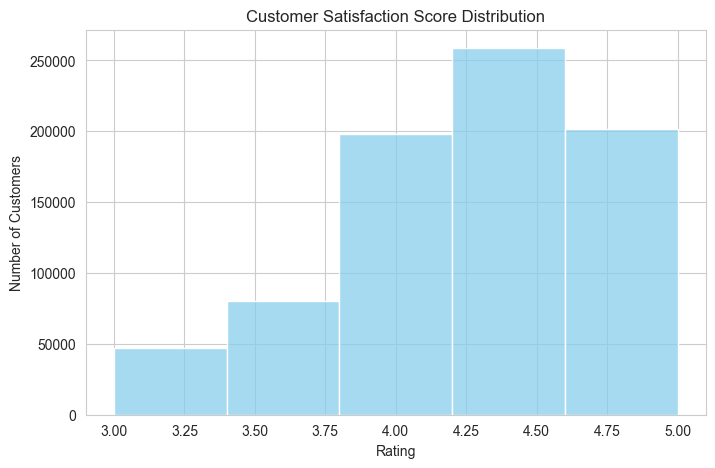

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# ----------------------------
# 1. Load Data
# ----------------------------
df = pd.read_csv(r"C:\code\Amazon_India_Analytics\data\cleaned\amazon_sales_cleaned.csv")

# Ensure numeric columns
if "customer_rating" in df.columns:
    df["customer_rating"] = pd.to_numeric(df["customer_rating"], errors="coerce")

if "resolution_time_days" in df.columns:
    df["resolution_time_days"] = pd.to_numeric(df["resolution_time_days"], errors="coerce")

# ----------------------------
# 2. Customer Satisfaction Distribution
# ----------------------------
if "customer_rating" in df.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(df["customer_rating"].dropna(), bins=5, kde=False, color="skyblue")
    plt.title("Customer Satisfaction Score Distribution")
    plt.xlabel("Rating")
    plt.ylabel("Number of Customers")
    plt.show()

# ----------------------------
# 3. Complaint Categories
# ----------------------------
if "complaint_category" in df.columns:
    complaint_counts = df["complaint_category"].value_counts().head(10)
    plt.figure(figsize=(8,5))
    sns.barplot(x=complaint_counts.values, y=complaint_counts.index, palette="magma")
    plt.title("Top Complaint Categories")
    plt.xlabel("Number of Complaints")
    plt.ylabel("Category")
    plt.show()

# ----------------------------
# 4. Average Resolution Time by Category
# ----------------------------
if "complaint_category" in df.columns and "resolution_time_days" in df.columns:
    resolution_avg = df.groupby("complaint_category")["resolution_time_days"].mean().sort_values()
    plt.figure(figsize=(8,5))
    sns.barplot(x=resolution_avg.values, y=resolution_avg.index, palette="coolwarm")
    plt.title("Average Resolution Time by Complaint Category")
    plt.xlabel("Resolution Time (Days)")
    plt.ylabel("Category")
    plt.show()

# ----------------------------
# 5. Overall Average Resolution Time
# ----------------------------
if "resolution_time_days" in df.columns:
    overall_avg_resolution = df["resolution_time_days"].mean()
    print(f"Overall Average Resolution Time: {overall_avg_resolution:.2f} days")


C:\Users\SURYA\AppData\Local\Temp\ipykernel_10832\711912104.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=supplier_revenue.values, y=supplier_revenue.index, palette="viridis")


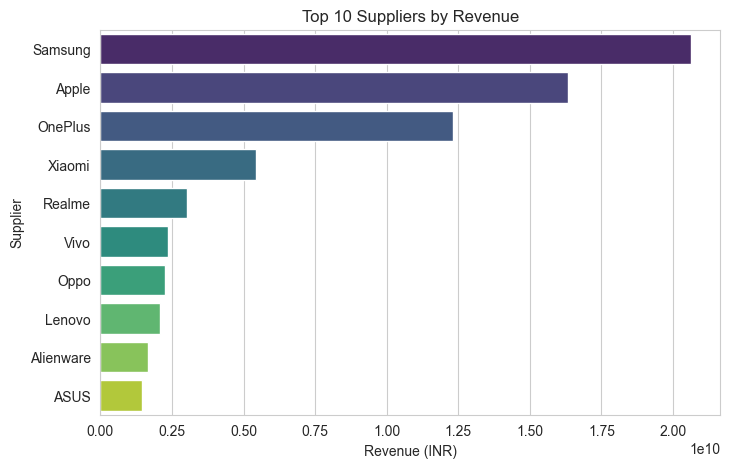

C:\Users\SURYA\AppData\Local\Temp\ipykernel_10832\711912104.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=supplier_delivery.values, y=supplier_delivery.index, palette="coolwarm")


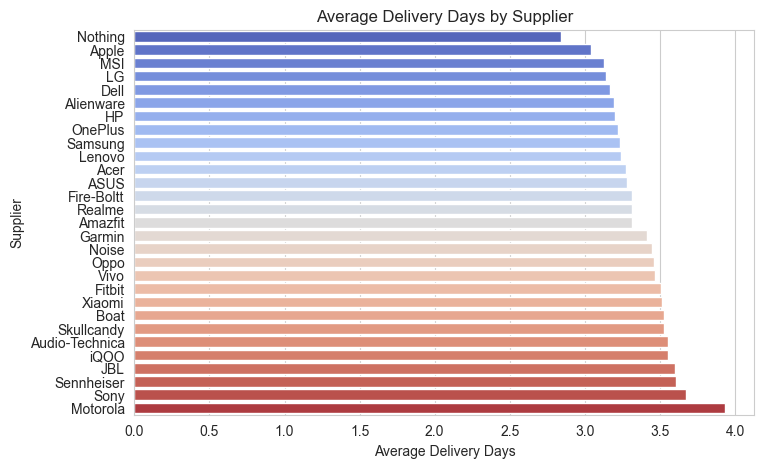

C:\Users\SURYA\AppData\Local\Temp\ipykernel_10832\711912104.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=supplier_cost.values, y=supplier_cost.index, palette="magma")


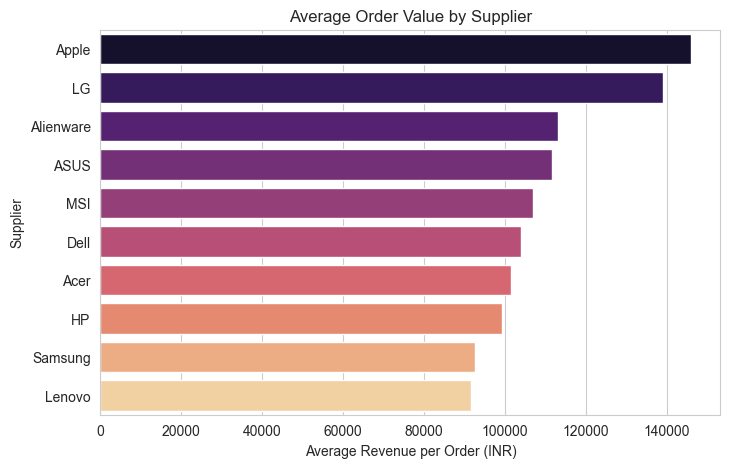

Top Suppliers with High Revenue and Fast Delivery:
brand
Apple      3.037782
OnePlus    3.223248
Samsung    3.233150
Realme     3.316462
Xiaomi     3.510726
Name: delivery_days, dtype: float64


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# ----------------------------
# 1. Load Data
# ----------------------------
df = pd.read_csv(r"C:\code\Amazon_India_Analytics\data\cleaned\amazon_sales_cleaned.csv")

# Ensure numeric columns
df["final_amount_inr"] = pd.to_numeric(df["final_amount_inr"], errors="coerce")
df["delivery_days"] = pd.to_numeric(df["delivery_days"], errors="coerce")
df["quantity"] = pd.to_numeric(df["quantity"], errors="coerce")

# ----------------------------
# 2. Supplier Performance (Revenue)
# ----------------------------
if "brand" in df.columns:  # Assuming brand represents supplier/vendor
    supplier_revenue = df.groupby("brand")["final_amount_inr"].sum().sort_values(ascending=False).head(10)
    plt.figure(figsize=(8,5))
    sns.barplot(x=supplier_revenue.values, y=supplier_revenue.index, palette="viridis")
    plt.title("Top 10 Suppliers by Revenue")
    plt.xlabel("Revenue (INR)")
    plt.ylabel("Supplier")
    plt.show()

# ----------------------------
# 3. Delivery Reliability (Average Delivery Days by Supplier)
# ----------------------------
if "brand" in df.columns:
    supplier_delivery = df.groupby("brand")["delivery_days"].mean().sort_values()
    plt.figure(figsize=(8,5))
    sns.barplot(x=supplier_delivery.values, y=supplier_delivery.index, palette="coolwarm")
    plt.title("Average Delivery Days by Supplier")
    plt.xlabel("Average Delivery Days")
    plt.ylabel("Supplier")
    plt.show()

# ----------------------------
# 4. Cost Analysis (Average Order Value by Supplier)
# ----------------------------
if "brand" in df.columns:
    supplier_cost = df.groupby("brand")["final_amount_inr"].mean().sort_values(ascending=False).head(10)
    plt.figure(figsize=(8,5))
    sns.barplot(x=supplier_cost.values, y=supplier_cost.index, palette="magma")
    plt.title("Average Order Value by Supplier")
    plt.xlabel("Average Revenue per Order (INR)")
    plt.ylabel("Supplier")
    plt.show()

# ----------------------------
# 5. Vendor Management Insights
# ----------------------------
# Identify suppliers with fastest delivery and high revenue
top_suppliers = supplier_revenue.head(5).index
fast_delivery = supplier_delivery.loc[top_suppliers].sort_values()
print("Top Suppliers with High Revenue and Fast Delivery:")
print(fast_delivery)


C:\Users\SURYA\AppData\Local\Temp\ipykernel_10832\2519504681.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")


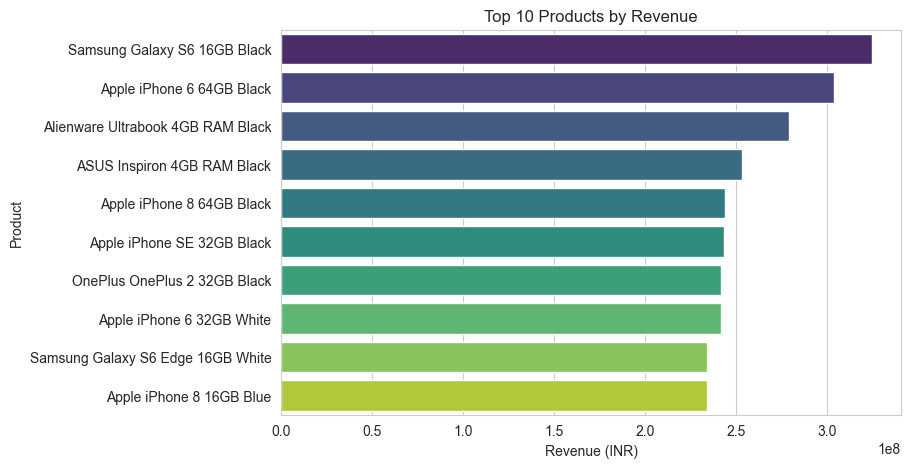

Top 10 Product Pairs Bought Together:
Empty DataFrame
Columns: [Product Pair, Count]
Index: []


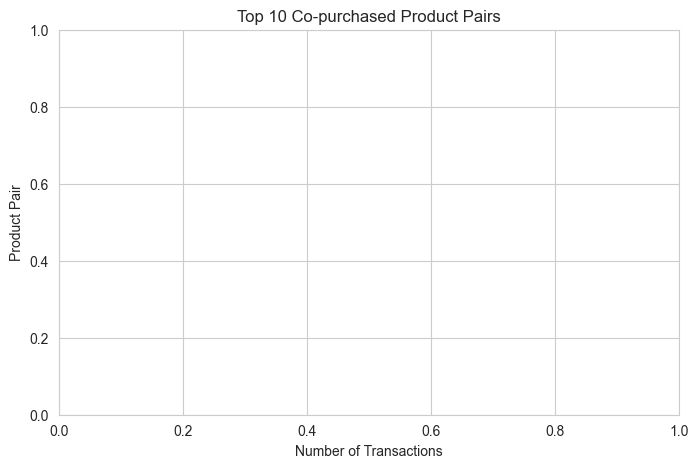

Products Recommended for Upselling:
product_name
Samsung Galaxy S6 16GB Black         3.243214e+08
Apple iPhone 6 64GB Black            3.038824e+08
Alienware Ultrabook 4GB RAM Black    2.791681e+08
ASUS Inspiron 4GB RAM Black          2.533582e+08
Apple iPhone 8 64GB Black            2.437773e+08
Name: final_amount_inr, dtype: float64


In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from collections import Counter

sns.set_style("whitegrid")

# ----------------------------
# 1. Load Data
# ----------------------------
df = pd.read_csv(r"C:\code\Amazon_India_Analytics\data\cleaned\amazon_sales_cleaned.csv")

# Ensure numeric columns
df["final_amount_inr"] = pd.to_numeric(df["final_amount_inr"], errors="coerce")
df["quantity"] = pd.to_numeric(df["quantity"], errors="coerce")

# ----------------------------
# 2. Top Products by Revenue
# ----------------------------
top_products = df.groupby("product_name")["final_amount_inr"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 10 Products by Revenue")
plt.xlabel("Revenue (INR)")
plt.ylabel("Product")
plt.show()

# ----------------------------
# 3. Simple Product Association (Co-purchased Products)
# ----------------------------
# Group products by transaction_id
transactions = df.groupby("transaction_id")["product_name"].apply(list)

# Count pairs of products bought together
pair_counts = Counter()
for items in transactions:
    for pair in combinations(items, 2):
        pair_counts[pair] += 1

# Most common co-purchased pairs
top_pairs = pair_counts.most_common(10)
top_pairs_df = pd.DataFrame(top_pairs, columns=["Product Pair", "Count"])
print("Top 10 Product Pairs Bought Together:")
print(top_pairs_df)

# ----------------------------
# 4. Bundle Opportunity Visualization
# ----------------------------
plt.figure(figsize=(8,5))
sns.barplot(x=top_pairs_df["Count"], y=top_pairs_df["Product Pair"], palette="magma")
plt.title("Top 10 Co-purchased Product Pairs")
plt.xlabel("Number of Transactions")
plt.ylabel("Product Pair")
plt.show()

# ----------------------------
# 5. Upselling Opportunity (High Revenue Products)
# ----------------------------
# Highlight top revenue products for upselling
print("Products Recommended for Upselling:")
print(top_products.head(5))


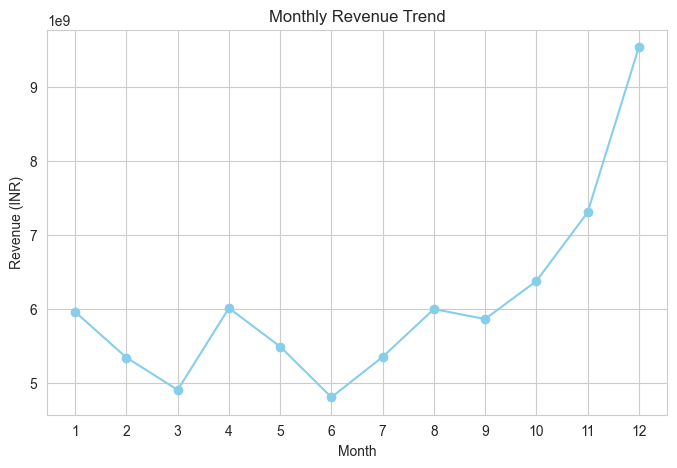

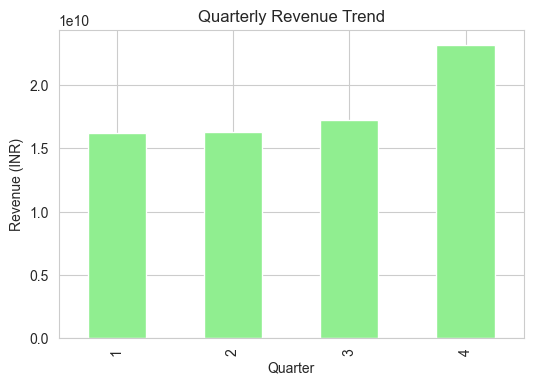

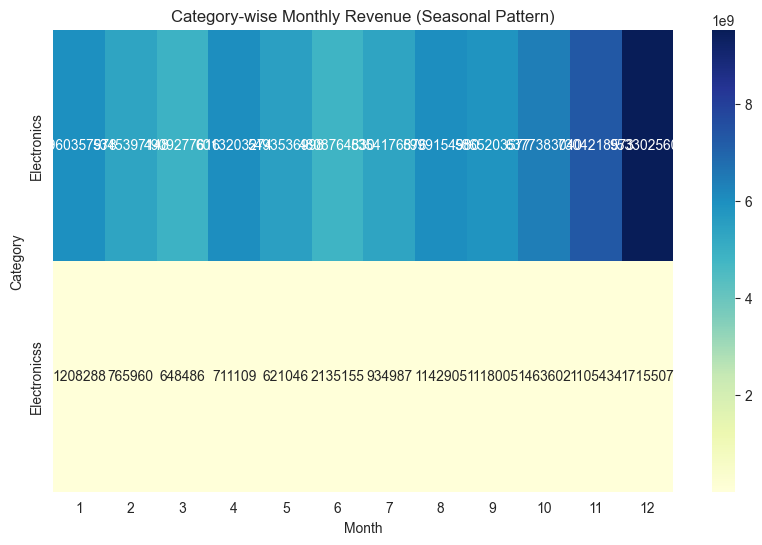

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# ----------------------------
# 1. Load Data
# ----------------------------
df = pd.read_csv(r"C:\code\Amazon_India_Analytics\data\cleaned\amazon_sales_cleaned.csv")

# Ensure numeric and datetime columns
df["final_amount_inr"] = pd.to_numeric(df["final_amount_inr"], errors="coerce")
df["order_date"] = pd.to_datetime(df["order_date"], errors="coerce")
df = df[df["order_date"].notna()]

# ----------------------------
# 2. Add Month and Quarter
# ----------------------------
df["order_month"] = df["order_date"].dt.month
df["order_quarter"] = df["order_date"].dt.quarter

# ----------------------------
# 3. Monthly Revenue Trend
# ----------------------------
monthly_sales = df.groupby("order_month")["final_amount_inr"].sum()

plt.figure(figsize=(8,5))
monthly_sales.plot(marker='o', color='skyblue')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue (INR)")
plt.xticks(range(1,13))
plt.show()

# ----------------------------
# 4. Quarterly Revenue Trend
# ----------------------------
quarterly_sales = df.groupby("order_quarter")["final_amount_inr"].sum()

plt.figure(figsize=(6,4))
quarterly_sales.plot(kind='bar', color='lightgreen')
plt.title("Quarterly Revenue Trend")
plt.xlabel("Quarter")
plt.ylabel("Revenue (INR)")
plt.show()

# ----------------------------
# 5. Category-wise Seasonal Sales
# ----------------------------
category_monthly = df.groupby(["category", "order_month"])["final_amount_inr"].sum().unstack()

plt.figure(figsize=(10,6))
sns.heatmap(category_monthly, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title("Category-wise Monthly Revenue (Seasonal Pattern)")
plt.xlabel("Month")
plt.ylabel("Category")
plt.show()


Total Revenue: INR 72,977,270,979.84
Total Orders: 1070780
Total Customers: 350111
Average Order Value: INR 68,153.38


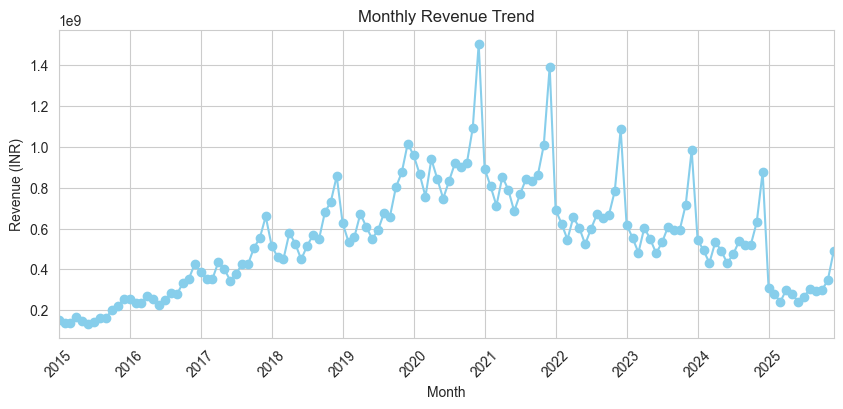

C:\Users\SURYA\AppData\Local\Temp\ipykernel_10832\1371486072.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_revenue.values, y=category_revenue.index, palette="viridis")


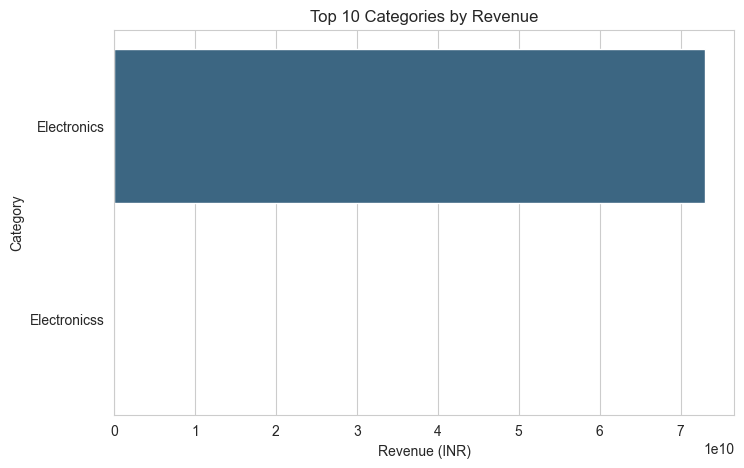

C:\Users\SURYA\AppData\Local\Temp\ipykernel_10832\1371486072.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_revenue.values, y=brand_revenue.index, palette="magma")


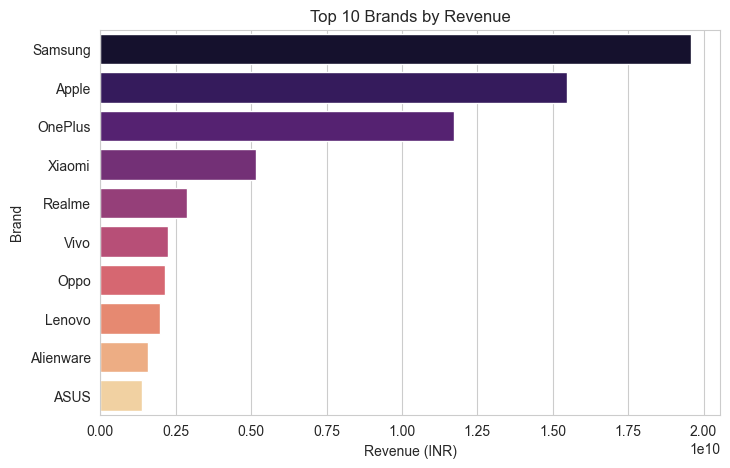

Alert: Months with revenue below average:
[Period('2015-01', 'M'), Period('2015-02', 'M'), Period('2015-03', 'M'), Period('2015-04', 'M'), Period('2015-05', 'M'), Period('2015-06', 'M'), Period('2015-07', 'M'), Period('2015-08', 'M'), Period('2015-09', 'M'), Period('2015-10', 'M'), Period('2015-11', 'M'), Period('2015-12', 'M'), Period('2016-01', 'M'), Period('2016-02', 'M'), Period('2016-03', 'M'), Period('2016-04', 'M'), Period('2016-05', 'M'), Period('2016-06', 'M'), Period('2016-07', 'M'), Period('2016-08', 'M'), Period('2016-09', 'M'), Period('2016-10', 'M'), Period('2016-11', 'M'), Period('2016-12', 'M'), Period('2017-01', 'M'), Period('2017-02', 'M'), Period('2017-03', 'M'), Period('2017-04', 'M'), Period('2017-05', 'M'), Period('2017-06', 'M'), Period('2017-07', 'M'), Period('2017-08', 'M'), Period('2017-09', 'M'), Period('2017-10', 'M'), Period('2018-01', 'M'), Period('2018-02', 'M'), Period('2018-03', 'M'), Period('2018-05', 'M'), Period('2018-06', 'M'), Period('2018-07', 'M'

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# ----------------------------
# 1. Load Data
# ----------------------------
df = pd.read_csv(r"C:\code\Amazon_India_Analytics\data\cleaned\amazon_sales_cleaned.csv")

# Ensure numeric and datetime columns
df["final_amount_inr"] = pd.to_numeric(df["final_amount_inr"], errors="coerce")
df["quantity"] = pd.to_numeric(df["quantity"], errors="coerce")
df["order_date"] = pd.to_datetime(df["order_date"], errors="coerce")
df = df[df["order_date"].notna()]

# ----------------------------
# 2. Key Metrics
# ----------------------------
total_revenue = df["final_amount_inr"].sum()
total_orders = df["transaction_id"].nunique()
total_customers = df["customer_id"].nunique()
average_order_value = total_revenue / total_orders

print(f"Total Revenue: INR {total_revenue:,.2f}")
print(f"Total Orders: {total_orders}")
print(f"Total Customers: {total_customers}")
print(f"Average Order Value: INR {average_order_value:,.2f}")

# ----------------------------
# 3. Revenue Trend (Monthly)
# ----------------------------
df['order_month'] = df['order_date'].dt.to_period('M')
monthly_revenue = df.groupby('order_month')["final_amount_inr"].sum()

plt.figure(figsize=(10,4))
monthly_revenue.plot(marker='o', color='skyblue')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue (INR)")
plt.xticks(rotation=45)
plt.show()

# ----------------------------
# 4. Top Categories by Revenue
# ----------------------------
category_revenue = df.groupby("category")["final_amount_inr"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=category_revenue.values, y=category_revenue.index, palette="viridis")
plt.title("Top 10 Categories by Revenue")
plt.xlabel("Revenue (INR)")
plt.ylabel("Category")
plt.show()

# ----------------------------
# 5. Top Brands by Revenue
# ----------------------------
brand_revenue = df.groupby("brand")["final_amount_inr"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=brand_revenue.values, y=brand_revenue.index, palette="magma")
plt.title("Top 10 Brands by Revenue")
plt.xlabel("Revenue (INR)")
plt.ylabel("Brand")
plt.show()

# ----------------------------
# 6. Simple Alerts (Low Revenue Month)
# ----------------------------
low_months = monthly_revenue[monthly_revenue < monthly_revenue.mean()].index
print("Alert: Months with revenue below average:")
print(list(low_months))
